# Preparations

In [1]:
import Pkg
Pkg.DEFAULT_IO[] = stdout;

#### Fetch Required Packages

In [2]:
using Revise
using Catalyst
using CatalystSupport
using DifferentialEquations
using KernelDensity
using Plots, Plots.Measures
using Statistics
using StatsPlots

#### Other

In [3]:
gr(); 
default(framestyle=:box,grid=false,fmt=:png,guidefontsize=14);

# Make Figures

## Figure 2

In [18]:
@parameters η
rn = @reaction_network begin
    (p,d), 0 <--> X
end p d η;

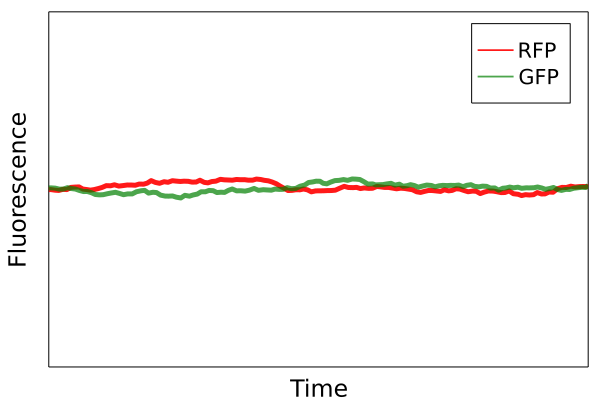

In [91]:
parameters = [10,0.1,.25]; u0 = [parameters[1]/parameters[2]]; tend = 75.;

prob_det = SDEProblem(rn,u0,(0.,tend),parameters,noise_scaling=η)
sol_det_1 = solve(prob_det,ImplicitEM()); 
plot(sol_det_1,lw=5,la=0.9,color=:red,label="RFP");
sol_det_2 = solve(prob_det,ImplicitEM()); 
plot!(sol_det_2,lw=5,la=0.7,color=:green,label="GFP");
noise_det_plot = plot!(xguide="Time",yguide="Fluorescence",legendfontsize=14,ylimit=(0.,200.),xlimit=(25.0,75.0),xticks=[],yticks=[],left_margin=5mm,guidefontsize=16)

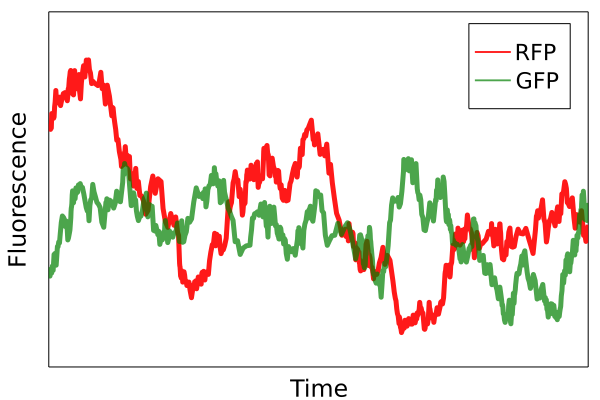

In [109]:
parameters = [10,0.1,3.5]; u0 = [parameters[1]/parameters[2]]; tend = 75.;

prob_intrinsic = SDEProblem(rn,u0,(0.,tend),parameters,noise_scaling=η)
#sol_intrinsic_1 = solve(prob_intrinsic,ImplicitEM()); 
plot(sol_intrinsic_1,lw=5,la=0.9,color=:red,label="RFP");
#sol_intrinsic_2 = solve(prob_intrinsic,ImplicitEM()); 
plot!(sol_intrinsic_2,lw=5,la=0.7,color=:green,label="GFP");
noise_intrinsic_plot = plot!(xguide="Time",yguide="Fluorescence",legendfontsize=15,ylimit=(0.,200.),xlimit=(25.0,75.0),xticks=[],yticks=[],left_margin=5mm,guidefontsize=16)

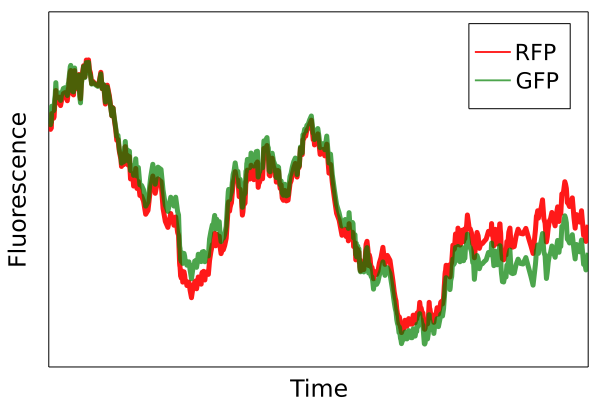

In [107]:
parameters = [10,0.1,3.5]; u0 = [parameters[1]/parameters[2]]; tend = 75.;

#prob_extrinsic = SDEProblem(rn,u0,(0.,tend),parameters,noise_scaling=η)
#sol_extrinsic_1 = solve(prob_intrinsic,ImplicitEM()); 
sol_extrinsic_1 = sol_intrinsic_1
traj_extrinsic_1 = first.(sol_extrinsic_1.u)
traj_extrinsic_2 = [(0.95+0.1*rand())*traj_extrinsic_1[1]]
for i = 2:length(traj_extrinsic_1)
    push!(traj_extrinsic_2,traj_extrinsic_2[end] + (1.0 + 0.5*(0.5-rand()))*(traj_extrinsic_1[i] - traj_extrinsic_1[i-1]))
end
plot(sol_extrinsic_1.t,traj_extrinsic_1,lw=5,la=0.9,color=:red,label="RFP")
plot!(sol_extrinsic_1.t,traj_extrinsic_2,lw=5,la=0.7,color=:green,label="GFP");
noise_extrinsic_plot = plot!(xguide="Time",yguide="Fluorescence",legendfontsize=15,ylimit=(0.,200.),xlimit=(25.0,75.0),xticks=[],yticks=[],left_margin=5mm,guidefontsize=16)

In [110]:
savefig(noise_det_plot,"Figures - Generated/noise_type_det.png"); savefig(noise_det_plot,"Figures - Generated/noise_type_det.svg");
savefig(noise_intrinsic_plot,"Figures - Generated/noise_type_intrinsic.png"); savefig(noise_intrinsic_plot,"Figures - Generated/noise_type_intrinsic.svg");
savefig(noise_extrinsic_plot,"Figures - Generated/noise_type_extrinsic.png"); savefig(noise_extrinsic_plot,"Figures - Generated/noise_type_extrinsic.svg");

## Figure 7

In [4]:
rn = @reaction_network begin
    (p,d), 0 <--> X
end p d;
parameters = [.5,0.05]
u0 = [1.]
tend = 100.;

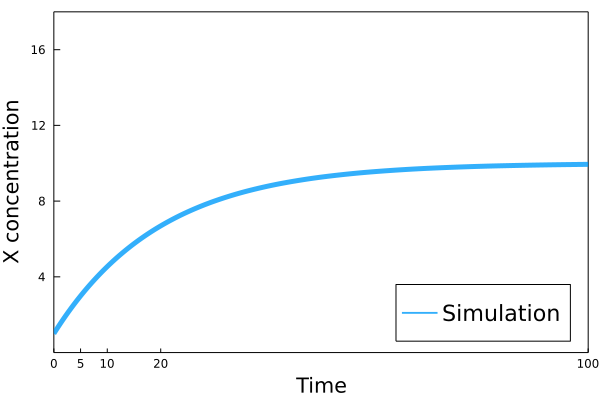

In [14]:
prob_RRE = ODEProblem(rn,u0,(0.,tend),parameters)
sol_RRE = solve(prob_RRE,Rosenbrock23()); 
plot(sol_RRE,lw=5,la=0.8,label="Simulation");
RRE_interpretation_plot = plot!(xguide="Time",yguide="X concentration",ylimit=(0.,18.),legend=:bottomright,legendfontsize=15,xticks=[0,5,10,20,100],yticks=[4,8,12,16])

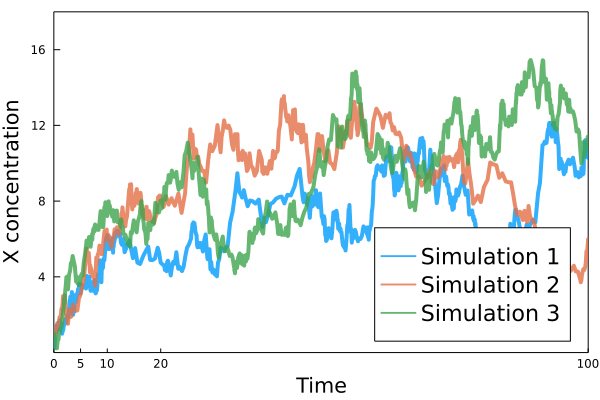

In [87]:
lw = 4; la = 0.8;
prob_CLE = SDEProblem(rn,u0,(0.,tend),parameters)
#sol_CLE1 = solve(prob_CLE,ImplicitEM()); 
plot(sol_CLE1,lw=lw,la=la,label="Simulation 1");
#sol_CLE2 = solve(prob_CLE,ImplicitEM()); 
plot!(sol_CLE2,lw=lw,la=la,label="Simulation 2");
#sol_CLE3 = solve(prob_CLE,ImplicitEM()); 
plot!(sol_CLE3,lw=lw,la=la,label="Simulation 3");
CLE_interpretation_plot = plot!(xguide="Time",yguide="X concentration",legend=:bottomright,legendfontsize=15,ylimit=(0.,18.),xticks=[0,5,10,20,100],yticks=[4,8,12,16])

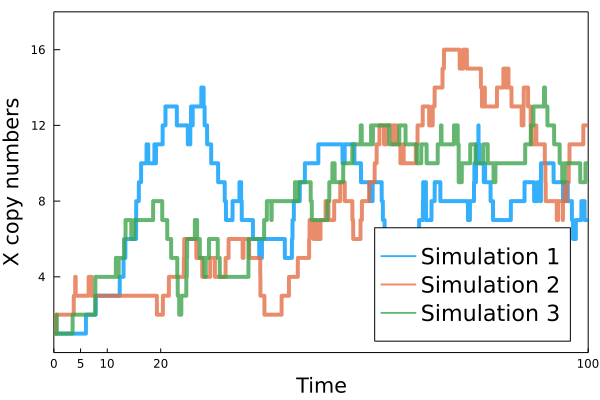

In [90]:
lw = 4; la = 0.8;
prob_Gillespie = DiscreteProblem(rn,Int64.(u0),(0.,tend),parameters)
prob_Gillespie = JumpProblem(rn,prob_Gillespie,Direct())
#sol_Gillespie1 = solve(prob_Gillespie,SSAStepper()); 
plot(sol_Gillespie1,lw=lw,la=la,label="Simulation 1");
#sol_Gillespie2 = solve(prob_Gillespie,SSAStepper()); 
plot!(sol_Gillespie2,lw=lw,la=la,label="Simulation 2");
#sol_Gillespie3 = solve(prob_Gillespie,SSAStepper()); 
plot!(sol_Gillespie3,lw=lw,la=la,label="Simulation 3");
Gillespie_interpretation_plot = plot!(xguide="Time",yguide="X copy numbers",legend=:bottomright,legendfontsize=15,ylimit=(0.,18.),xticks=[0,5,10,20,100],yticks=[4,8,12,16])

In [39]:
function cme(du,u,p,t)
    λ,β = p
    du[1] = β*u[2] - λ*u[1]; 
    du[n] = λ*u[n-1] - β*(n-1)*u[n]; 
    for i = 2:(n-1)
        du[i] = λ*u[i-1] - (λ+β*(i-1))*u[i] + β*i*u[i+1]; 
    end
end

function my_bar_plot!(data;lw=3,la=0.8,color=:blue,label="")
    xs = []; ys = [];
    foreach(i -> push!(xs,i-1.5,i-0.5), 1:length(data))
    foreach(d -> push!(ys,d,d), data)
    return plot!(xs,ys,lw=lw;la=la,color=color,label=label)
end;

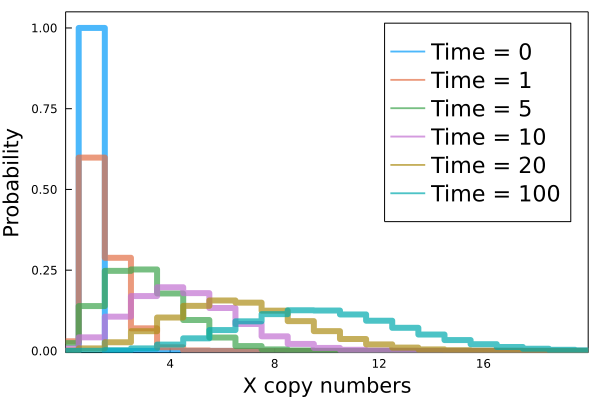

In [75]:
plot(); lw = 6; la = 0.7;
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==0.0)][1:end],lw=lw,la=la,color=1,label="Time = 0"); 
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==1.0)][1:end],lw=lw,la=la,color=2,label="Time = 1"); 
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==5.0)][1:end],lw=lw,la=la,color=3,label="Time = 5");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==10.0)][1:end],lw=lw,la=la,color=4,label="Time = 10");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==20.0)][1:end],lw=lw,la=la,color=5,label="Time = 20");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==100.0)][1:end],lw=lw,la=la,color=6,label="Time = 100");
CME_interpretation_plot = plot!(xguide="X copy numbers",yguide="Probability",xlimit=(0.,20.),ylimit=(-0.005,1.05),legendfontsize=15,xticks=[4,8,12,16],yticks=[0.0,0.25,0.50,0.75,1.0])

In [67]:
A(i,u,λ,β,grid) = (0 < i <= length(grid)) ? u[i]*(λ-β*grid[i]) : 0.0
B(i,u,λ,β,grid) = (0 < i <= length(grid)) ? u[i]*(λ+β*grid[i]) : 0.0
function cfpe(du,u,p,t)
    λ,β = p
    for i = 1:length(grid)
        du[i] = - (1/Δx) * (A(i,u,λ,β,grid) - A(i-1,u,λ,β,grid)) + (0.5/Δx^2) * (B(i+1,u,λ,β,grid) -2*B(i,u,λ,β,grid) + B(i-1,u,λ,β,grid))
    end
end
CFPE_get_y(sol_CFPE,t) = sol_CFPE[findfirst(sol_CFPE.t.==t)]/(sol_CFPE.t[2]*sum(sol_CFPE[findfirst(sol_CFPE.t.==t)]));

In [55]:
grid = 0:0.05:200.0; Δx = grid[2]
u0_CFPE = zeros(length(grid)); u0_CFPE[findfirst(grid.>=1.0)] = 1;
prob_CFPE = ODEProblem(cfpe,u0_CFPE,(0.,tend),parameters);
@time sol_CFPE = solve(prob_CFPE,tstops=0:0.05:tend,saveat=0.05);

128.535353 seconds (1.39 G allocations: 22.026 GiB, 2.54% gc time, 0.25% compilation time)


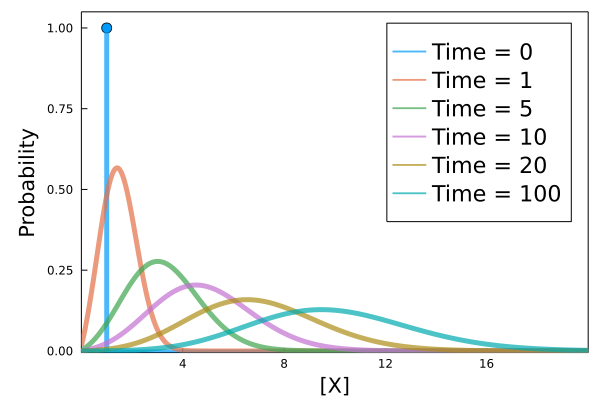

In [78]:
#plot(sol[findfirst(sol.t.==0.5)])
h = 1.0; lw = 5; la = 0.7;
scatter((u0[1],h),markersize=6,markershape=:circle,color=1,label="")
plot!([u0[1],u0[1]],[0,h],color=1,label="Time = 0",lw=lw,la=la)
plot!([0,tend],[0,0],color=1,label="",lw=3,la=0.7)
plot!(grid,CFPE_get_y(sol_CFPE,1.0),lw=lw,la=la,label="Time = 1",color=2)
plot!(grid,CFPE_get_y(sol_CFPE,5.0),lw=lw,la=la,label="Time = 5",color=3)
plot!(grid,CFPE_get_y(sol_CFPE,10.0),lw=lw,la=la,label="Time = 10",color=4)
plot!(grid,CFPE_get_y(sol_CFPE,20.0),lw=lw,la=la,label="Time = 20",color=5)
plot!(grid,CFPE_get_y(sol_CFPE,100.0),lw=lw,la=la,label="Time = 100",color=6)
CFPE_interpretation_plot = plot!(xguide="[X]",yguide="Probability",xlimit=(0.,20.),ylimit=(-0.005,1.05),legendfontsize=15,xticks=[4,8,12,16],left_margin=5mm)

In [94]:
savefig(plot!(CFPE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure7/fig7_generated_CFPE.png")
savefig(plot!(CFPE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure7/fig7_generated_CFPE.svg")
savefig(plot!(CME_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure7/fig7_generated_CME.png")
savefig(plot!(CME_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure7/fig7_generated_CME.svg")
savefig(plot!(Gillespie_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure7/fig7_generated_Gillespie.png")
savefig(plot!(Gillespie_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure7/fig7_generated_Gillespie.svg")
savefig(plot!(CLE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure7/fig7_generated_CLE.png")
savefig(plot!(CLE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure7/fig7_generated_CLE.svg")

In [ ]:
thesis_figure_7 = plot(RRE_interpretation_plot,CLE_interpretation_plot,Gillespie_interpretation_plot,CME_interpretation_plot,CFPE_interpretation_plot,size=(1500,700),xguide="",yguide="",bottom_margin=5mm,left_margin=10mm,right_margin=5mm,tickfontsize=12,layout=@layout[a b c; d e])

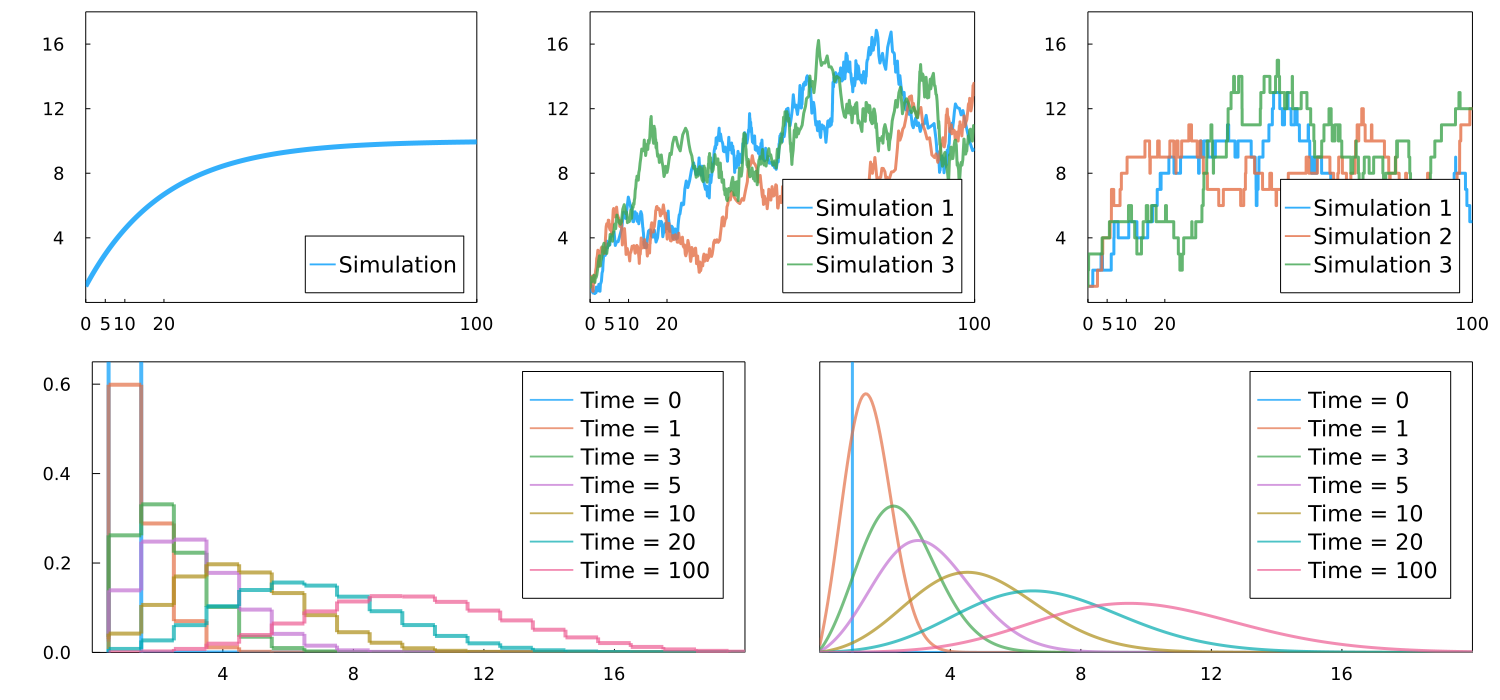

In [26]:
thesis_figure_7 = plot(RRE_interpretation_plot,CLE_interpretation_plot,Gillespie_interpretation_plot,CME_interpretation_plot,CFPE_interpretation_plot,size=(1500,700),xguide="",yguide="",bottom_margin=5mm,left_margin=10mm,right_margin=5mm,tickfontsize=12,layout=@layout[a b c; d e])

In [169]:
savefig(thesis_figure_7,"Figures/Figure7/fig7_generated_base.png")
savefig(thesis_figure_7,"Figures/Figure7/fig7_generated_base.svg")

## Figure 16

In [4]:
rn_no_ar = @reaction_network begin
    (v0+v,1), 0 <--> X
end v0 v
rn_pos_ar = @reaction_network begin
    (v0+hill(X,v,K,n),1), 0 <--> X
end v0 v K n
rn_neg_ar = @reaction_network begin
    (v0+hill(X,v,K,-n),1), 0 <--> X
end v0 v K n;

In [63]:
η = 0.1;
v0 = 0.; v = 1; p_no_ar = [v0,v,η];
v0 = 0.; v = 2.; K = v-1.; n = 1.; p_pos_ar = [v0,v,K,n,η];
v0 = 0.; v = 2.; K = 1/(v-1.); n = 1.; p_neg_ar = [v0,v,K,n,η];

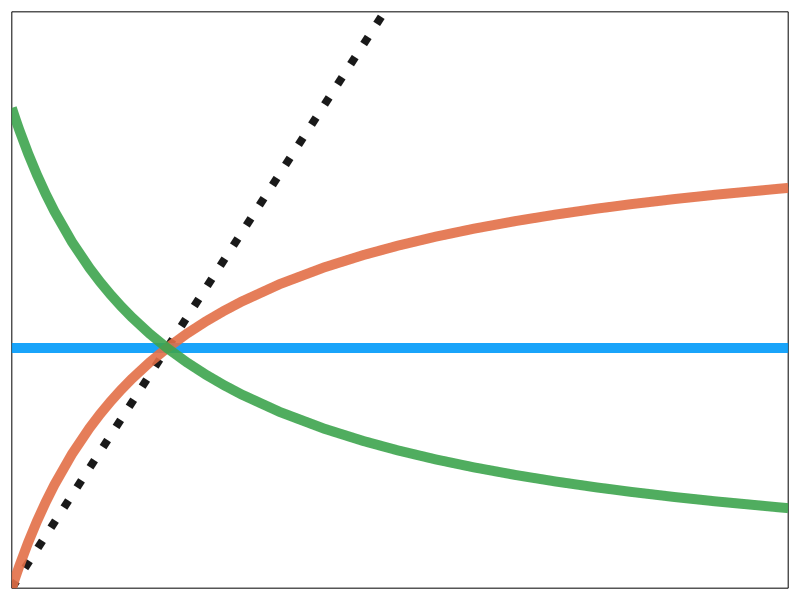

In [48]:
xend = 5.;
lw=10;la=0.9;

plot(x->x,0,xend,lw=8,la=la,linestyle=:dot,color=:black,label="Degradation rate")

plot!([0.,xend],[p_no_ar[1]+p_no_ar[2],p_no_ar[1]+p_no_ar[2]],lw=lw,la=la,color=1,label="No autoregulation")

plot!(x->p_pos_ar[1]+p_pos_ar[2]*(x^p_pos_ar[4])/(p_pos_ar[3]^p_pos_ar[4]+x^p_pos_ar[4]),0,xend,lw=lw,la=la,color=2,label="Positive autoregulation")

plot!(x->p_neg_ar[1]+p_neg_ar[2]*(p_neg_ar[3]^p_neg_ar[4])/(p_neg_ar[3]^p_neg_ar[4]+x^p_neg_ar[4]),0,xend,lw=lw,la=la,color=3,label="Negative autoregulation")

p_rates = plot!(xlimit=(0.,xend),ylimit=(0.,1.2*(v+v0)),legend=:none,legendfontsize=11,xticks=[],yticks=[],xguide="",yguide="",size=(800,600))

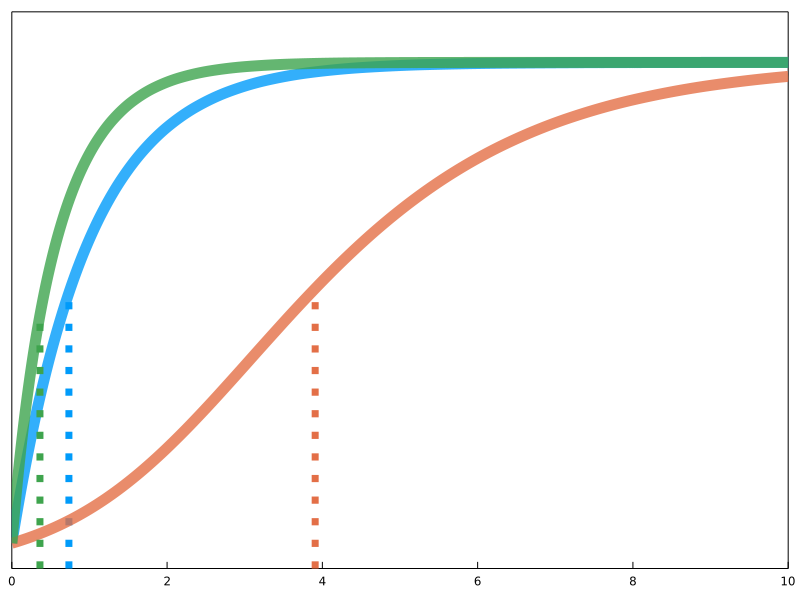

In [64]:
lw=11;la=0.8;

prob_no_ar = ODEProblem(rn_no_ar,[0.05],(0.,10.),p_no_ar)
sol_no_ar = solve(prob_no_ar,Rosenbrock23())
plot(sol_no_ar,lw=lw,la=la,color=1,label="No autoregulation")
t_halfmax_no_ar = sol_no_ar.t[findfirst(first.(sol_no_ar.u).>0.5)]
plot!([t_halfmax_no_ar,t_halfmax_no_ar],[0.,sol_no_ar.u[findfirst(first.(sol_no_ar.u).>0.5)][1]],color=1,lw=7,linestyle=:dot,label="")

prob_pos_ar = ODEProblem(rn_pos_ar,[0.05],(0.,10.),p_pos_ar)
sol_pos_ar = solve(prob_pos_ar,Rosenbrock23())
plot!(sol_pos_ar,lw=lw,la=la,color=2,label="Positive autoregulation")
t_halfmax_pos_ar = sol_pos_ar.t[findfirst(first.(sol_pos_ar.u).>0.5)]
plot!([t_halfmax_pos_ar,t_halfmax_pos_ar],[0.,sol_pos_ar.u[findfirst(first.(sol_pos_ar.u).>0.5)][1]],color=2,lw=7,linestyle=:dot,label="")

prob_neg_ar = ODEProblem(rn_neg_ar,[0.05],(0.,10.),p_neg_ar)
sol_neg_ar = solve(prob_neg_ar,Rosenbrock23())
plot!(sol_neg_ar,lw=lw,la=la,color=3,label="Negative autoregulation")
t_halfmax_neg_ar = sol_neg_ar.t[findfirst(first.(sol_neg_ar.u).>0.5)]
plot!([t_halfmax_neg_ar,t_halfmax_neg_ar],[0.,sol_neg_ar.u[findfirst(first.(sol_neg_ar.u).>0.5)][1]],color=3,lw=7,linestyle=:dot,label="")

p_activations = plot!(xguide="",yguide="",legend=:none,legendfontsize=1,yticks=[],ylimit=(0.,1.1),size=(800,600))

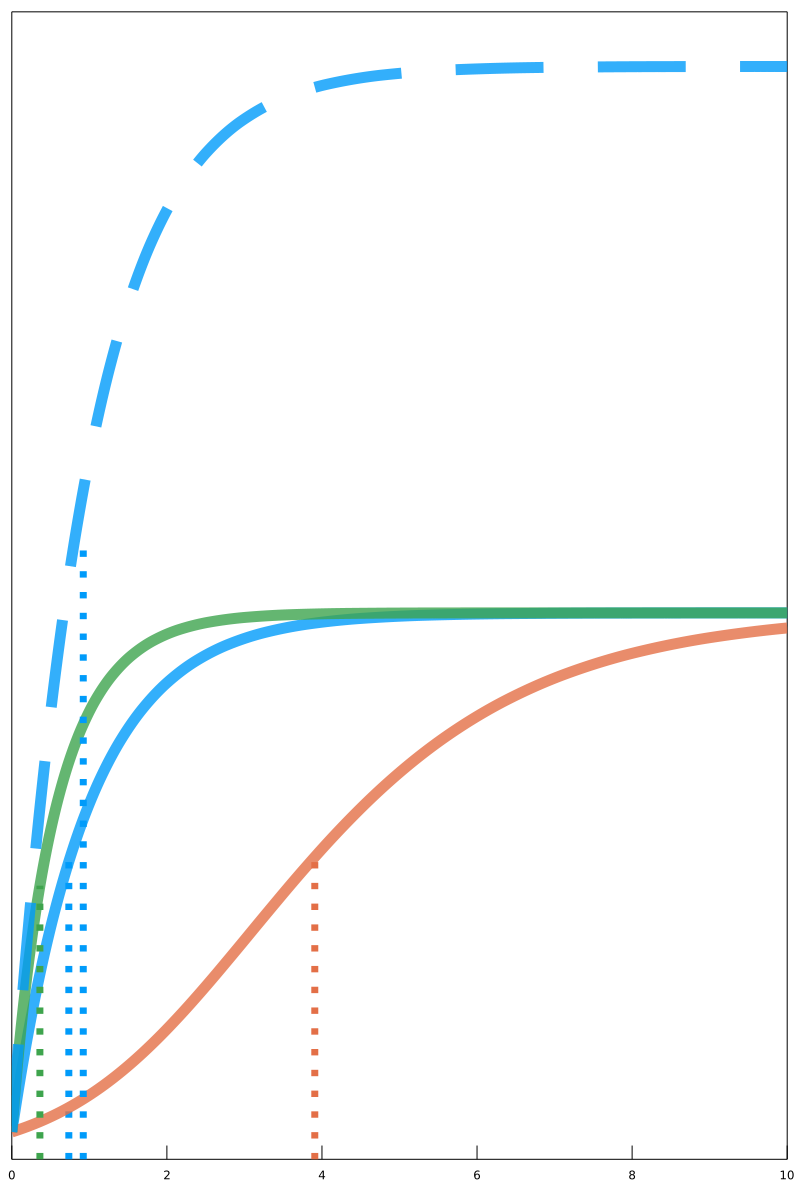

In [65]:
prob_no_ar_maxV = ODEProblem(rn_no_ar,[0.05],(0.,10.),p_pos_ar)
sol_no_ar_maxV = solve(prob_no_ar_maxV,Rosenbrock23())
plot(p_activations)
plot!(sol_no_ar_maxV,lw=lw,la=la,linestyle=:dash,color=1,label="No autoregulation, increased v",legend=:topright)
t_halfmax_no_ar_maxV = sol_no_ar.t[findfirst(first.(sol_no_ar_maxV.u).>1.0)]
p_activations_addition = plot!([t_halfmax_no_ar_maxV,t_halfmax_no_ar_maxV],[0.,sol_no_ar_maxV.u[findfirst(first.(sol_no_ar_maxV.u).>1.0)][1]],xguide="",color=1,lw=7,linestyle=:dot,label="",ylimit=(0.,2.1),legend=:none,size=(800,1200))

In [10]:
#A callback for keeping a simulation within the positive domain.
function positive_domain()
    condition(u,t,integrator) = minimum(u) < 0
    affect!(integrator) = integrator.u .= integrator.uprev
    return DiscreteCallback(condition,affect!,save_positions = (false,false))
end;

In [52]:
η = 0.1;
v0 = 0.; v = 1; p_no_ar = [v0,v,η];
v0 = 0.; v = 4.; K = v-1.; n = 1.; p_pos_ar = [v0,v,K,n,η];
v0 = 0.; v = 4.; K = 1/(v-1.); n = 1.; p_neg_ar = [v0,v,K,n,η];
v0 = 0.; v = 2.; K = 0.4; n = 5; η = 0.4; p_pos_ar_bistable = [v0,v,K,n,η];

In [68]:
tend = 50000;

prob_no_ar = SDEProblem(rn_no_ar,[1.],(0.,10*tend),p_no_ar,noise_scaling=(@variables η)[1])
sol_no_ar = solve(prob_no_ar,ImplicitEM(),maxiters=1000000000)

prob_pos_ar = SDEProblem(rn_pos_ar,[1.],(0.,10*tend),p_pos_ar,noise_scaling=(@variables η)[1])
sol_pos_ar = solve(prob_pos_ar,ImplicitEM(),maxiters=1000000000)

prob_neg_ar = SDEProblem(rn_neg_ar,[1.],(0.,10*tend),p_neg_ar,noise_scaling=(@variables η)[1])
sol_neg_ar = solve(prob_neg_ar,ImplicitEM(),maxiters=1000000000)

prob_pos_ar_bistable = SDEProblem(rn_pos_ar,[2.],(0.,10000.),p_pos_ar_bistable,noise_scaling=(@variables η)[1])
@time sol_pos_ar_bistable = solve(prob_pos_ar_bistable,ImplicitEM(),adaptive=false,dt=0.00025,saveat=1.,callback=positive_domain(),maxiters=1000000000);

 49.039113 seconds (10.27 M allocations: 654.477 MiB, 1.18% gc time, 10.45% compilation time)


In [69]:
function my_dens_plot!(sol;xlimit=(-10.0,10.0),lw=5,color=1,label="",la=0.9,linestyle=:solid)
    kdens = kde(first.(sol.u))
    plot!([xlimit[1],kdens.x...,xlimit[2]],[0.0,kdens.density...,0.0],xlimit=xlimit,lw=lw,color=color,label=label,la=la,linestyle=linestyle)
end;

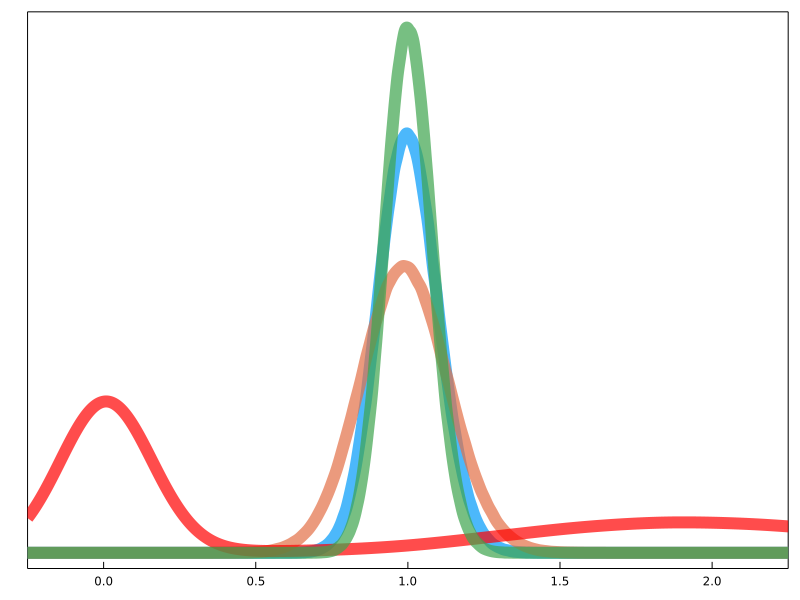

In [70]:
plot()
my_dens_plot!(sol_no_ar,lw=12,la=0.7,label="No autoregulation",color=1,xlimit=(-0.25,2.25))
my_dens_plot!(sol_pos_ar,lw=12,la=0.7,label="Positive autoregulation",color=2,xlimit=(-0.25,2.25))
my_dens_plot!(sol_pos_ar_bistable,lw=12,la=0.7,label="Positive autoregulation - bistable",color=:red,xlimit=(-0.25,2.25))
my_dens_plot!(sol_neg_ar,lw=12,la=0.7,label="Negative autoregulation",color=3,xlimit=(-0.25,2.25))
p_distributions_addition = plot!(legendfontsize=10,yticks=[],left_margin=5mm,xlimit=(-0.25,2.25),legend=:none,size=(800,600))

In [60]:
savefig(p_distributions_addition,"Figures/Figure16/distributions.png")
savefig(p_distributions_addition,"Figures/Figure16/distributions.svg")
savefig(p_activations,"Figures/Figure16/activations.png")
savefig(p_activations,"Figures/Figure16/activations.svg")
savefig(p_activations_addition,"Figures/Figure16/activations_with_addition.png")
savefig(p_activations_addition,"Figures/Figure16/activations_with_addition.svg")
savefig(p_rates,"Figures/Figure16/prod_rates.png")
savefig(p_rates,"Figures/Figure16/prod_rates.svg")

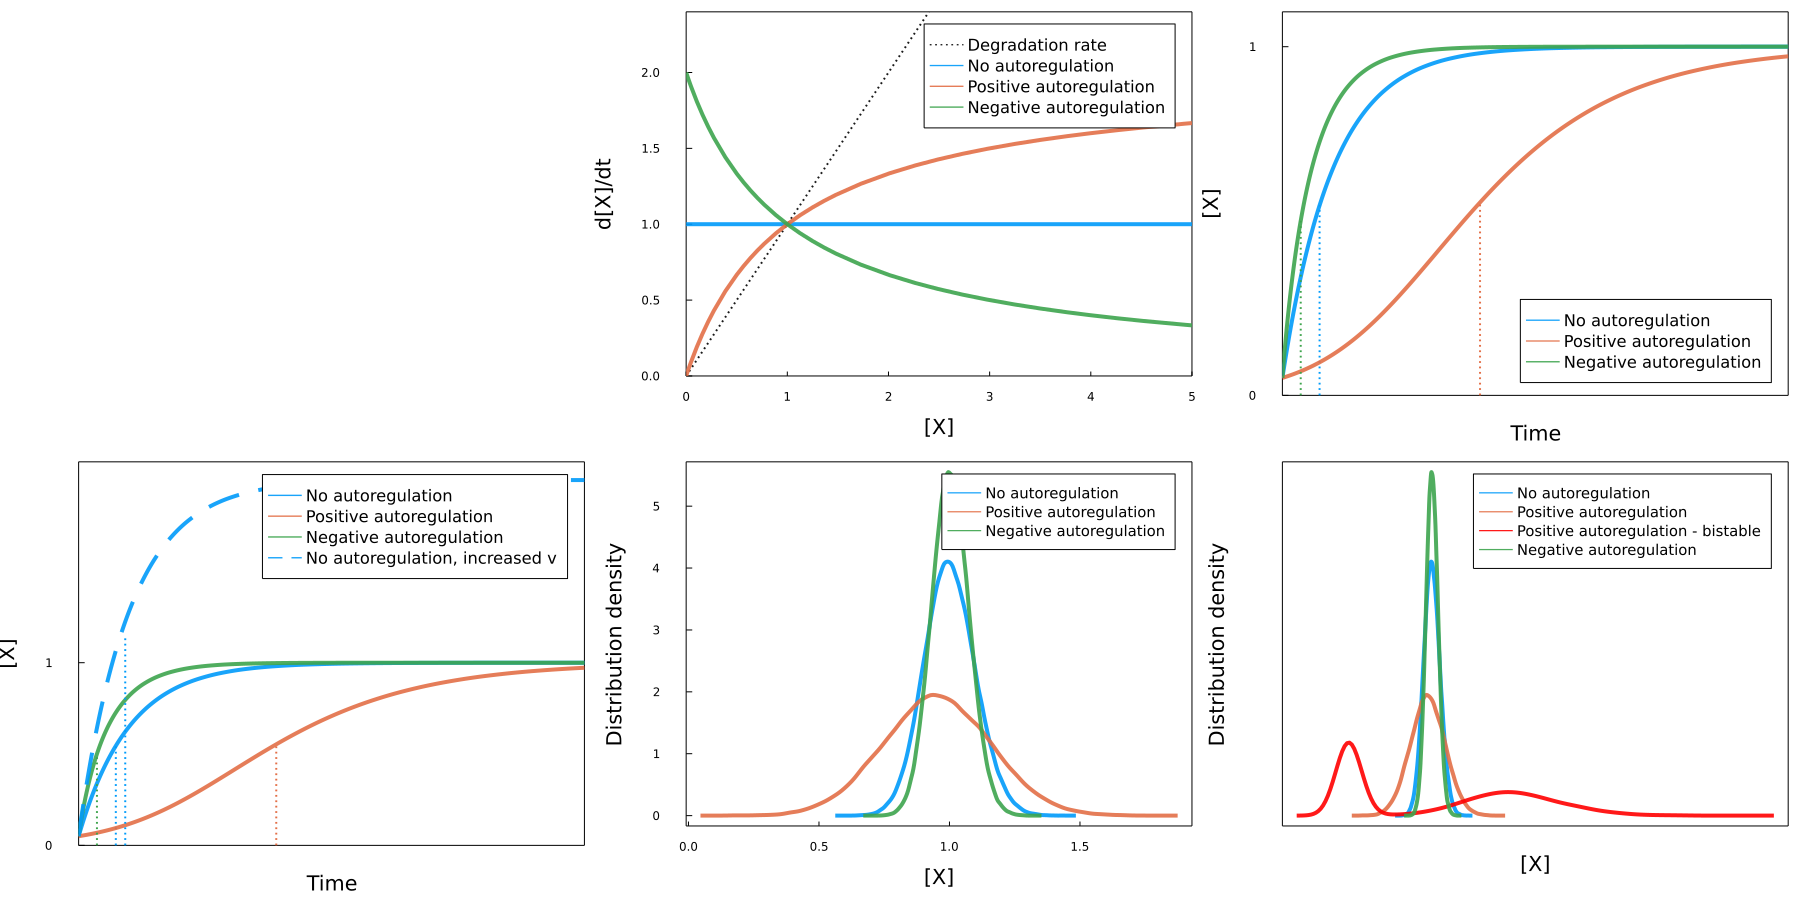

In [237]:
thesis_figure_16 = plot(plot(xticks=[],yticks=[],framestyle=:none),p_rates,p_activations,p_activations_addition,p_distributions,p_distributions_addition,size=(1800,900),left_margin=7mm,bottom_margin=8mm,layout=@layout [a c d;b e f])

In [99]:
savefig(thesis_figure_16,"Figures - Thesis/autoregulation_properties.png")

In [255]:
using KernelDensity

In [258]:
kdist = kde(first.(sol_no_ar.u));
fieldnames(typeof(kdist))

(:x, :density)

In [262]:
function my_dens_plot!(sol;xlimit=(-10.0,10.0),lw=5,color=1,label="",la=0.9,linestyle=:solid)
    kdens = kde(first.(sol.u))
    plot!([xlimit[1],kdist.x...,xlimit[2]],[0.0,kdist.density...,0.0],xlimit=xlimit,lw=lw,color=color,label=label,la=la,linestyle=linestyle)
end;

my_dens_plot! (generic function with 1 method)

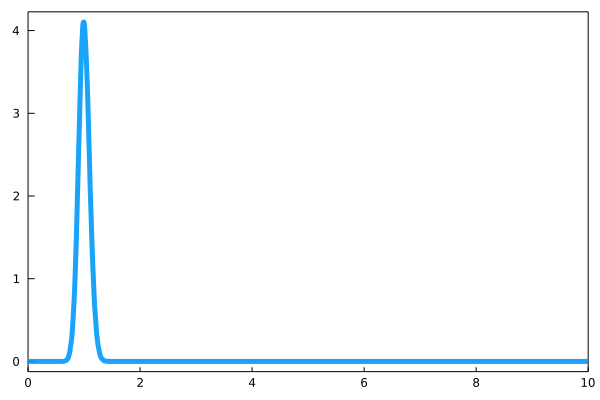

In [263]:
plot();my_dens_plot!(sol_pos_ar)

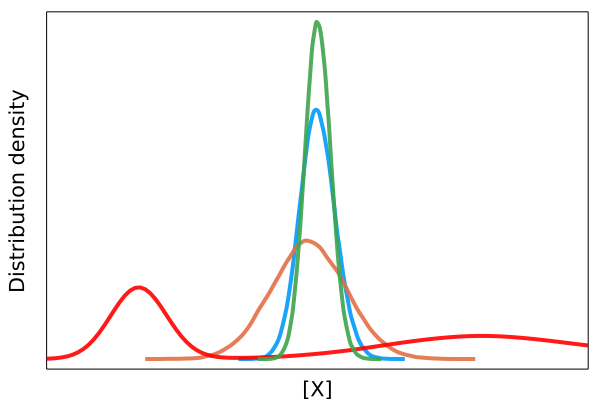

In [253]:
density(first.(sol_no_ar.u),lw=4,la=0.9,label="No autoregulation",color=1)
density!(first.(sol_pos_ar.u),lw=4,la=0.9,label="Positive autoregulation",color=2)
density!(first.(sol_pos_ar_bistable.u),lw=4,la=0.9,label="Positive autoregulation - bistable",color=:red)
p_distributions_addition = density!(first.(sol_neg_ar.u),xlimit=(-0.5,2.5),lw=4,la=0.9,label="Negative autoregulation",legend=:none,legendfontsize=10,color=3,xticks=[],yticks=[],xguide="[X]",yguide="Distribution density",left_margin=5mm)

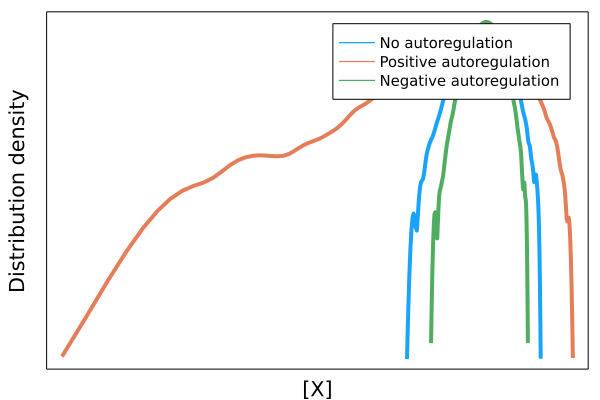

In [243]:
density(first.(sol_no_ar.u),lw=4,la=0.9,label="No autoregulation",color=1)
density!(first.(sol_pos_ar.u),lw=4,la=0.9,label="Positive autoregulation",color=2)
p_distributions_addition = density!(first.(sol_neg_ar.u),lw=4,la=0.9, xaxis=:log, yaxis=:log,label="Negative autoregulation",legendfontsize=10,color=3,xticks=[],yticks=[],xguide="[X]",yguide="Distribution density",left_margin=5mm)

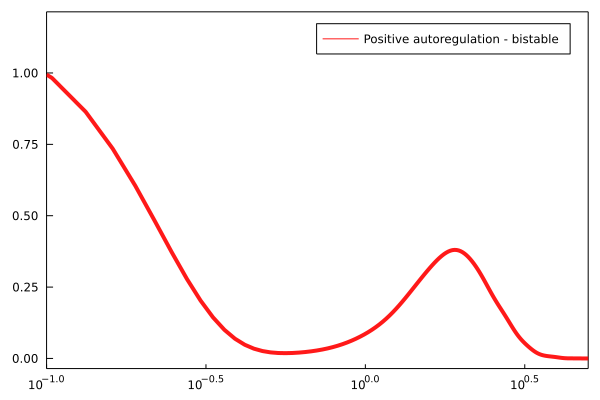

In [246]:
density(first.(sol_pos_ar_bistable.u),lw=4,la=0.9,label="Positive autoregulation - bistable",color=:red,xlimit=(0.1,5.0), xaxis=:log)

## Figure 17

In [106]:
function fitzhugh_nagumo(du,u,p,t)
    v,w = u
    a,b,τ = p
    
    du[1] = v - (v^3)/3 - w + fitzhugh_nagumo_input(t)
    du[2] = (v + a -b*w)/τ
end;
nc1(p,I) = (v -> v - (v^3)/3 + I)
nc2(p,I) = (v -> (v+p[1])/p[2]);

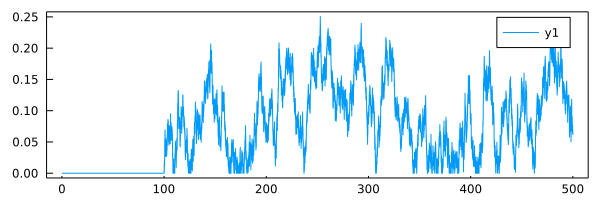

In [137]:
grid = 0.0:0.01:500;
input = zeros(length(grid))
for i = 10000:50001
    input[i] = max(0.9998*input[i-1]+(rand()-0.5)/100,0.0)
end
plot(grid,input,size=(600,200))

In [128]:
u0 = solve(ODEProblem(fitzhugh_nagumo,[1.0,2.0],(-100.0,0.0),parameters)).u[end];

In [133]:
tend = 500;
parameters = [0.7,0.7,12.5]
fitzhugh_nagumo_input(t) = (t<100.) ? 0.0 : 0.25
prob_sde_FhN = ODEProblem(fitzhugh_nagumo,u0,(0.0,tend),parameters)
sol_1 = solve(prob_sde_FhN,adaptive=false,dt=0.05)
p1 = plot(0.:0.1:tend,fitzhugh_nagumo_input.(0.:0.1:tend),ylimit=(-0.1,0.6),xlimit=(0.,tend),color=:red,xticks=[],yticks=[0.0,0.5],yguide="I(t)",label="",xguide="",lw=3,la=0.8)
p2 = plot(sol_1,vars=[1],label="",xlimit=(0.,tend),lw=3,yguide="v(t)",xguide="Time")
plot(sol_1,vars=(1,2),label="(v,w)(t)",lw=3,la=0.4,yguide="w",xguide="v",legendfontsize=8,color=fill(1,length(sol_1.t))')
plot!(nc1(parameters,0.),color=:pink,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=5,la=0.7,label="nullcline: dv/dt=0 (I=0.0)")
plot!(nc1(parameters,0.25),color=:red,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=5,la=0.7,label="nullcline: dv/dt=0 (I=0.25)")
plot!(nc2(parameters,0.),color=:green,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=5,la=0.7,label="nullcline: dw/dt=0")
p3 = scatter!((u0[1],u0[2]),label="(v,w)(0)",color=1,markersize=7)
excitable_sbp1 = plot(p1,p2,p3,size=(600,700),layout=@layout [a{0.1h}; b{0.3h}; c]);

In [134]:
tend = 500;
parameters = [0.7,0.7,12.5]
fitzhugh_nagumo_input(t) = (t<100.) ? 0.0 : 0.5 
prob_sde_FhN = ODEProblem(fitzhugh_nagumo,u0,(0.0,tend),parameters)
sol_2 = solve(prob_sde_FhN)
p1 = plot(0.:0.1:tend,fitzhugh_nagumo_input.(0.:0.1:tend),ylimit=(-0.1,0.6),xlimit=(0.,tend),color=:red,xticks=[],yticks=[0.0,0.5],yguide="",label="",xguide="",lw=3,la=0.8)
p2 = plot(sol_2,vars=[1],label="",xlimit=(0.,tend),lw=3,yguide="",xguide="Time")
plot(sol_2,vars=(1,2),label="(v,w)(t)",lw=3,la=0.4,yguide="",xguide="v",legendfontsize=8,color=fill(1,length(sol_2.t))')
plot!(nc1(parameters,0.),color=:pink,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=5,la=0.7,label="nullcline: dv/dt=0 (I=0.0)")
plot!(nc1(parameters,0.5),color=:red,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=5,la=0.7,label="nullcline: dv/dt=0 (I=0.5)")
plot!(nc2(parameters,0.),color=:green,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=5,la=0.7,label="nullcline: dw/dt=0")
p3 = scatter!((u0[1],u0[2]),label="(v,w)(0)",color=1,markersize=7)
excitable_sbp2 = plot(p1,p2,p3,size=(600,700),layout=@layout [a{0.1h}; b{0.3h}; c]);

In [135]:
tend = 500;
parameters = [0.7,0.7,12.5]
fitzhugh_nagumo_input(t) = input[findfirst(grid .>= t)]
prob_sde_FhN = ODEProblem(fitzhugh_nagumo,u0,(0.0,tend),parameters)
sol_3 = solve(prob_sde_FhN)
p1 = plot(0.:0.1:tend,fitzhugh_nagumo_input.(0.:0.1:tend),ylimit=(-0.1,0.6),xlimit=(0.,tend),color=:red,xticks=[],yticks=[0.0,0.5],label="",xguide="",lw=3,la=0.8)
p2 = plot(sol_3,vars=[1],label="",xlimit=(0.,tend),lw=3,yguide="",xguide="Time")
plot(sol_3,vars=(1,2),label="(v,w)(t)",lw=3,la=0.4,yguide="",xguide="v",legendfontsize=8,color=fill(1,length(sol_3.t))')
plot!(nc1(parameters,0.),color=:pink,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=5,la=0.7,label="nullcline: dv/dt=0 (I=0.0)")
plot!(nc2(parameters,0.),color=:green,xlimit=(-2.5,2.0),ylimit=(-0.8,2.blueberry pie1),lw=5,la=0.7,label="nullcline: dw/dt=0")
p3 = scatter!((u0[1],u0[2]),label="(v,w)(0)",color=1,markersize=7)
excitable_sbp3 = plot(p1,p2,p3,size=(600,700),layout=@layout [a{0.1h}; b{0.3h}; c]);

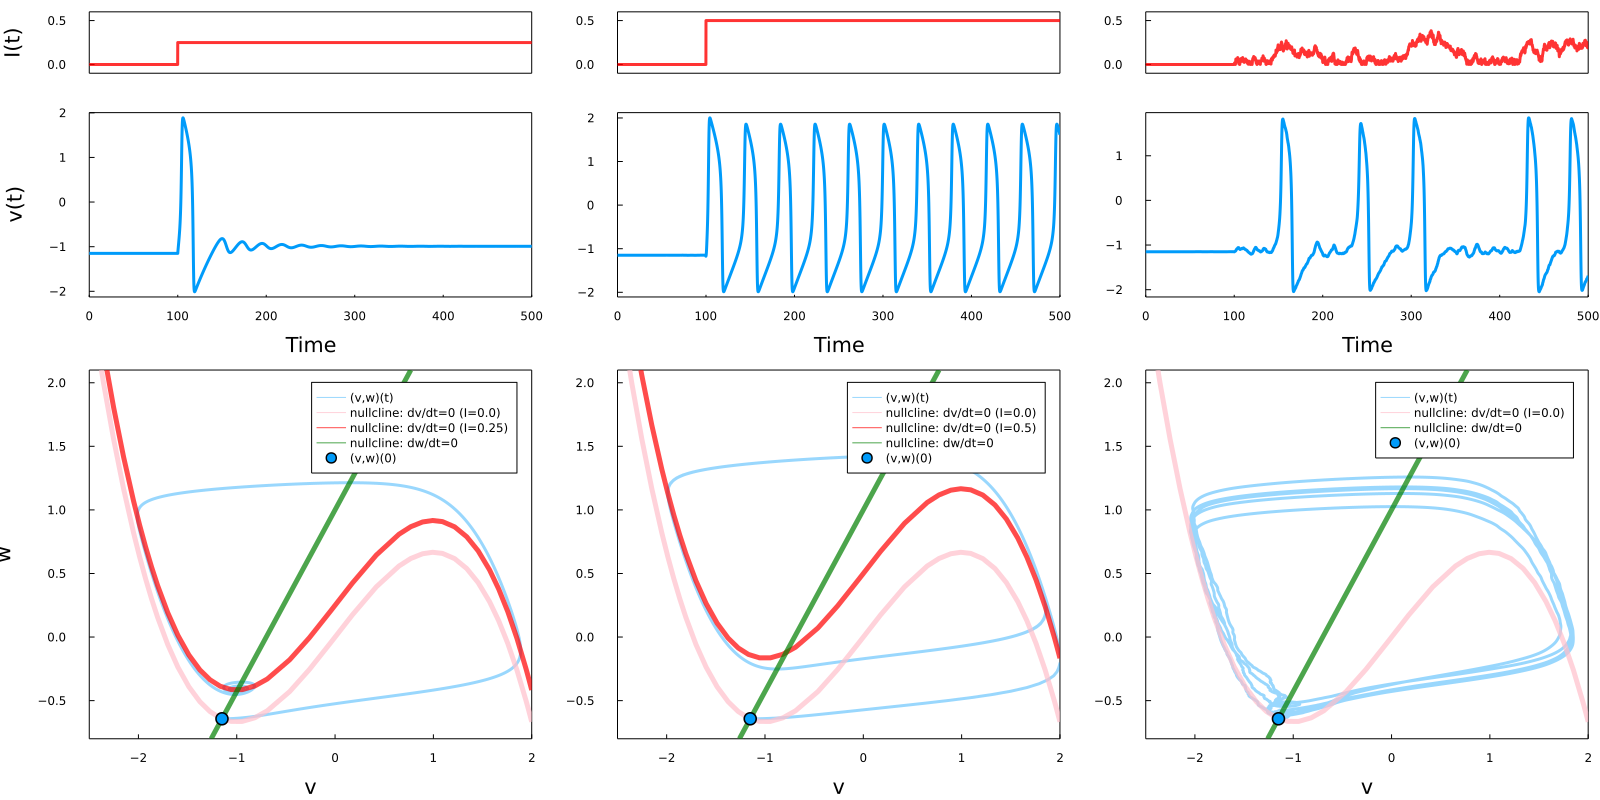

In [136]:
thesis_figure_17 = plot(excitable_sbp1,excitable_sbp2,excitable_sbp3,layout=(1,3),size=(1600,800),left_margin=5mm,bottom_margin=5mm)

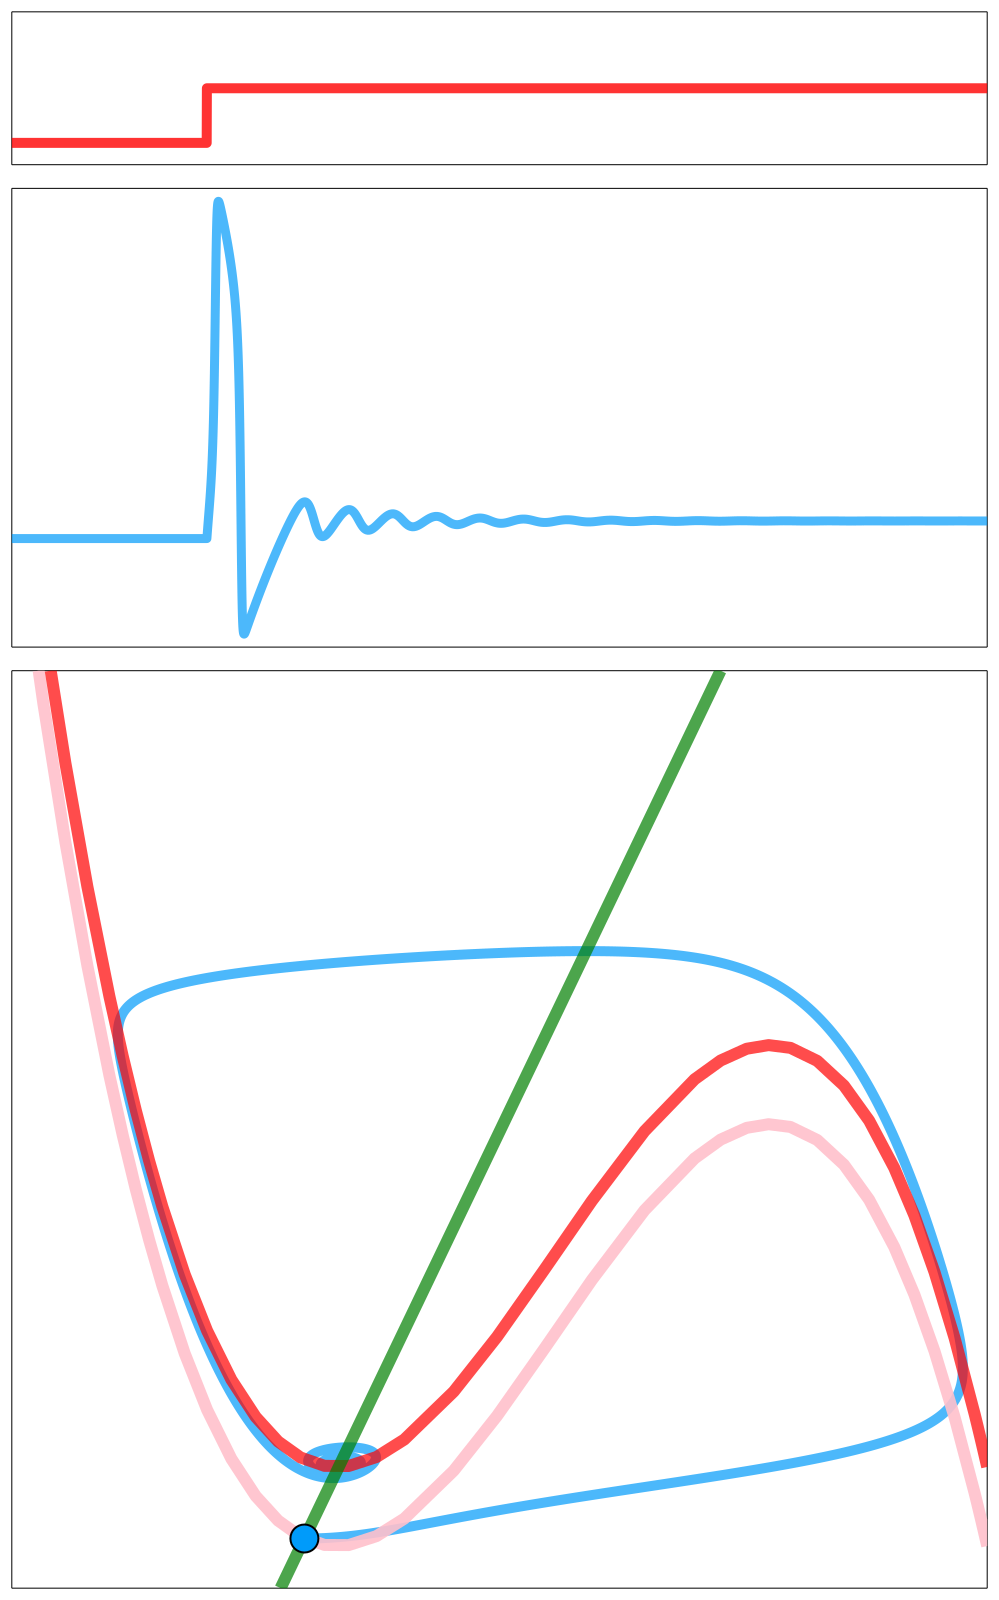

In [209]:
tend = 500;
parameters = [0.7,0.7,12.5]
fitzhugh_nagumo_input(t) = (t<100.) ? 0.0 : 0.25
prob_sde_FhN = ODEProblem(fitzhugh_nagumo,u0,(0.0,tend),parameters)
sol_1 = solve(prob_sde_FhN,adaptive=false,dt=0.05)
p1 = plot(0.:0.1:tend,fitzhugh_nagumo_input.(0.:0.1:tend),ylimit=(-0.1,0.6),xlimit=(0.,tend),color=:red,xticks=[],yticks=[0.0,0.5],yguide="I(t)",label="",xguide="",lw=10,la=0.8)
p2 = plot(sol_1,vars=[1],label="",xlimit=(0.,tend),lw=9,la=0.7,yguide="v(t)",xguide="Time")
plot(sol_1,vars=(1,2),label="(v,w)(t)",lw=10,la=0.7,yguide="w",xguide="v",legendfontsize=8,color=fill(1,length(sol_1.t))')
plot!(nc1(parameters,0.),color=:pink,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=12,la=0.9,label="nullcline: dv/dt=0 (I=0.0)")
plot!(nc1(parameters,0.25),color=:red,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=12,la=0.7,label="nullcline: dv/dt=0 (I=0.25)")
plot!(nc2(parameters,0.),color=:green,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=12,la=0.7,label="nullcline: dw/dt=0")
p3 = scatter!((u0[1],u0[2]),label="(v,w)(0)",color=1,markersize=16)
excitable_sbp1 = plot(p1,p2,p3,xticks=[],yticks=[],xguide="",yguide="",legend=:none,size=(1000,1600),layout=@layout [a{0.1h}; b{0.3h}; c])

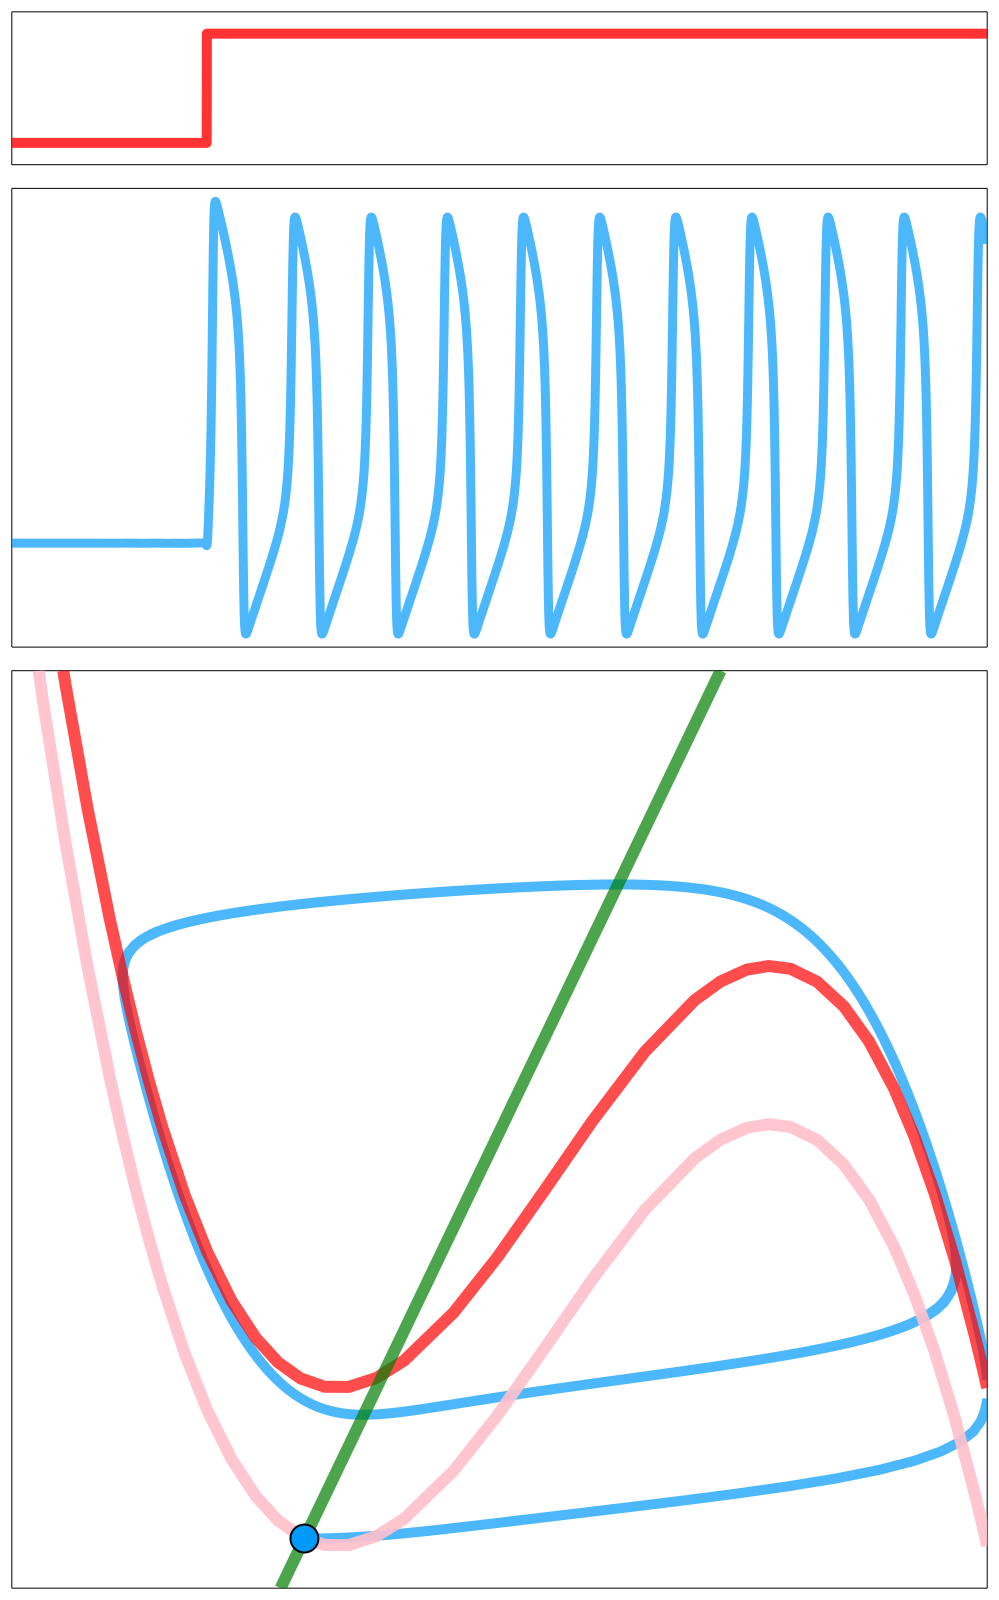

In [210]:
tend = 500;
parameters = [0.7,0.7,12.5]
fitzhugh_nagumo_input(t) = (t<100.) ? 0.0 : 0.5 
prob_sde_FhN = ODEProblem(fitzhugh_nagumo,u0,(0.0,tend),parameters)
sol_2 = solve(prob_sde_FhN)
p1 = plot(0.:0.1:tend,fitzhugh_nagumo_input.(0.:0.1:tend),ylimit=(-0.1,0.6),xlimit=(0.,tend),color=:red,xticks=[],yticks=[0.0,0.5],yguide="",label="",xguide="",lw=10,la=0.8)
p2 = plot(sol_2,vars=[1],label="",xlimit=(0.,tend),lw=9,la=0.7,yguide="",xguide="Time")
plot(sol_2,vars=(1,2),label="(v,w)(t)",lw=10,la=0.7,yguide="",xguide="v",legendfontsize=8,color=fill(1,length(sol_2.t))')
plot!(nc1(parameters,0.),color=:pink,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=12,la=0.9,label="nullcline: dv/dt=0 (I=0.0)")
plot!(nc1(parameters,0.5),color=:red,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=12,la=0.7,label="nullcline: dv/dt=0 (I=0.5)")
plot!(nc2(parameters,0.),color=:green,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=12,la=0.7,label="nullcline: dw/dt=0")
p3 = scatter!((u0[1],u0[2]),label="(v,w)(0)",color=1,markersize=16)
excitable_sbp2 = plot(p1,p2,p3,xticks=[],yticks=[],xguide="",yguide="",legend=:none,size=(1000,1600),layout=@layout [a{0.1h}; b{0.3h}; c])

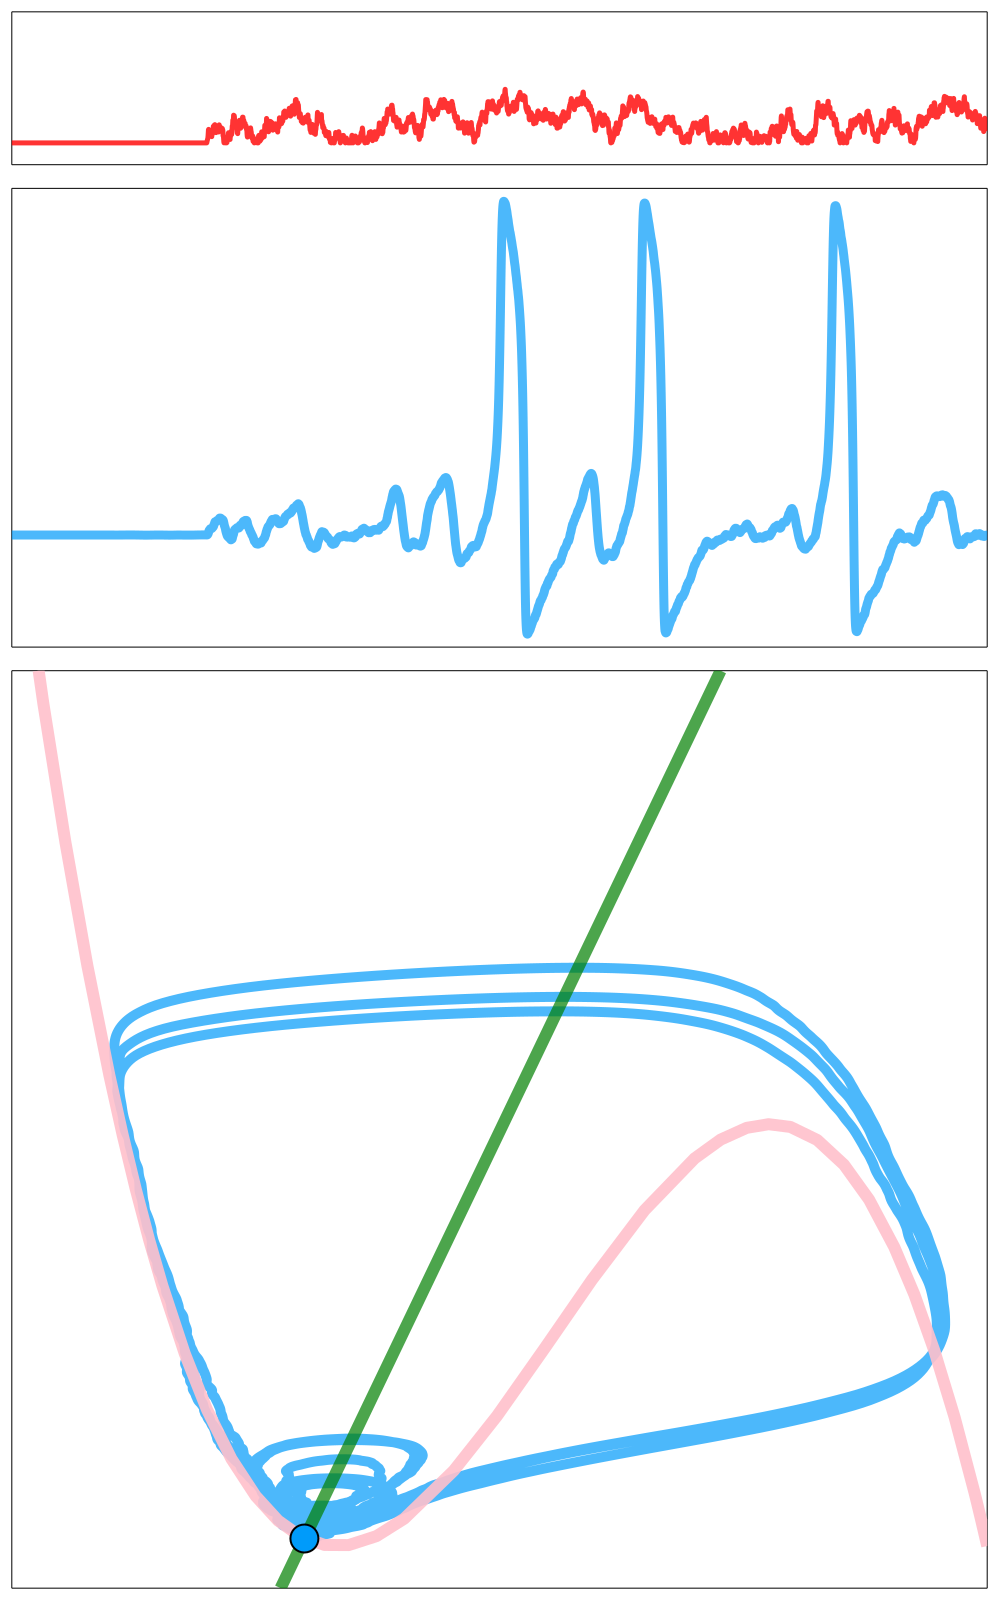

In [207]:
tend = 500;
parameters = [0.7,0.7,12.5]
fitzhugh_nagumo_input(t) = input[findfirst(grid .>= t)]
prob_sde_FhN = ODEProblem(fitzhugh_nagumo,u0,(0.0,tend),parameters)
sol_3 = solve(prob_sde_FhN)
p1 = plot(0.:0.1:tend,fitzhugh_nagumo_input.(0.:0.1:tend),ylimit=(-0.1,0.6),xlimit=(0.,tend),color=:red,xticks=[],yticks=[0.0,0.5],label="",xguide="",lw=5,la=0.8)
p2 = plot(sol_3,vars=[1],label="",xlimit=(0.,tend),lw=9,la=0.7,yguide="",xguide="Time")
plot(sol_3,vars=(1,2),label="(v,w)(t)",lw=10,la=0.7,yguide="",xguide="v",legendfontsize=8,color=fill(1,length(sol_3.t))')
plot!(nc1(parameters,0.),color=:pink,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=12,la=0.9,label="nullcline: dv/dt=0 (I=0.0)")
plot!(nc2(parameters,0.),color=:green,xlimit=(-2.5,2.0),ylimit=(-0.8,2.1),lw=12,la=0.7,label="nullcline: dw/dt=0")
p3 = scatter!((u0[1],u0[2]),label="(v,w)(0)",color=1,markersize=16)
excitable_sbp3 = plot(p1,p2,p3,xticks=[],yticks=[],xguide="",yguide="",legend=:none,size=(1000,1600),layout=@layout [a{0.1h}; b{0.3h}; c])

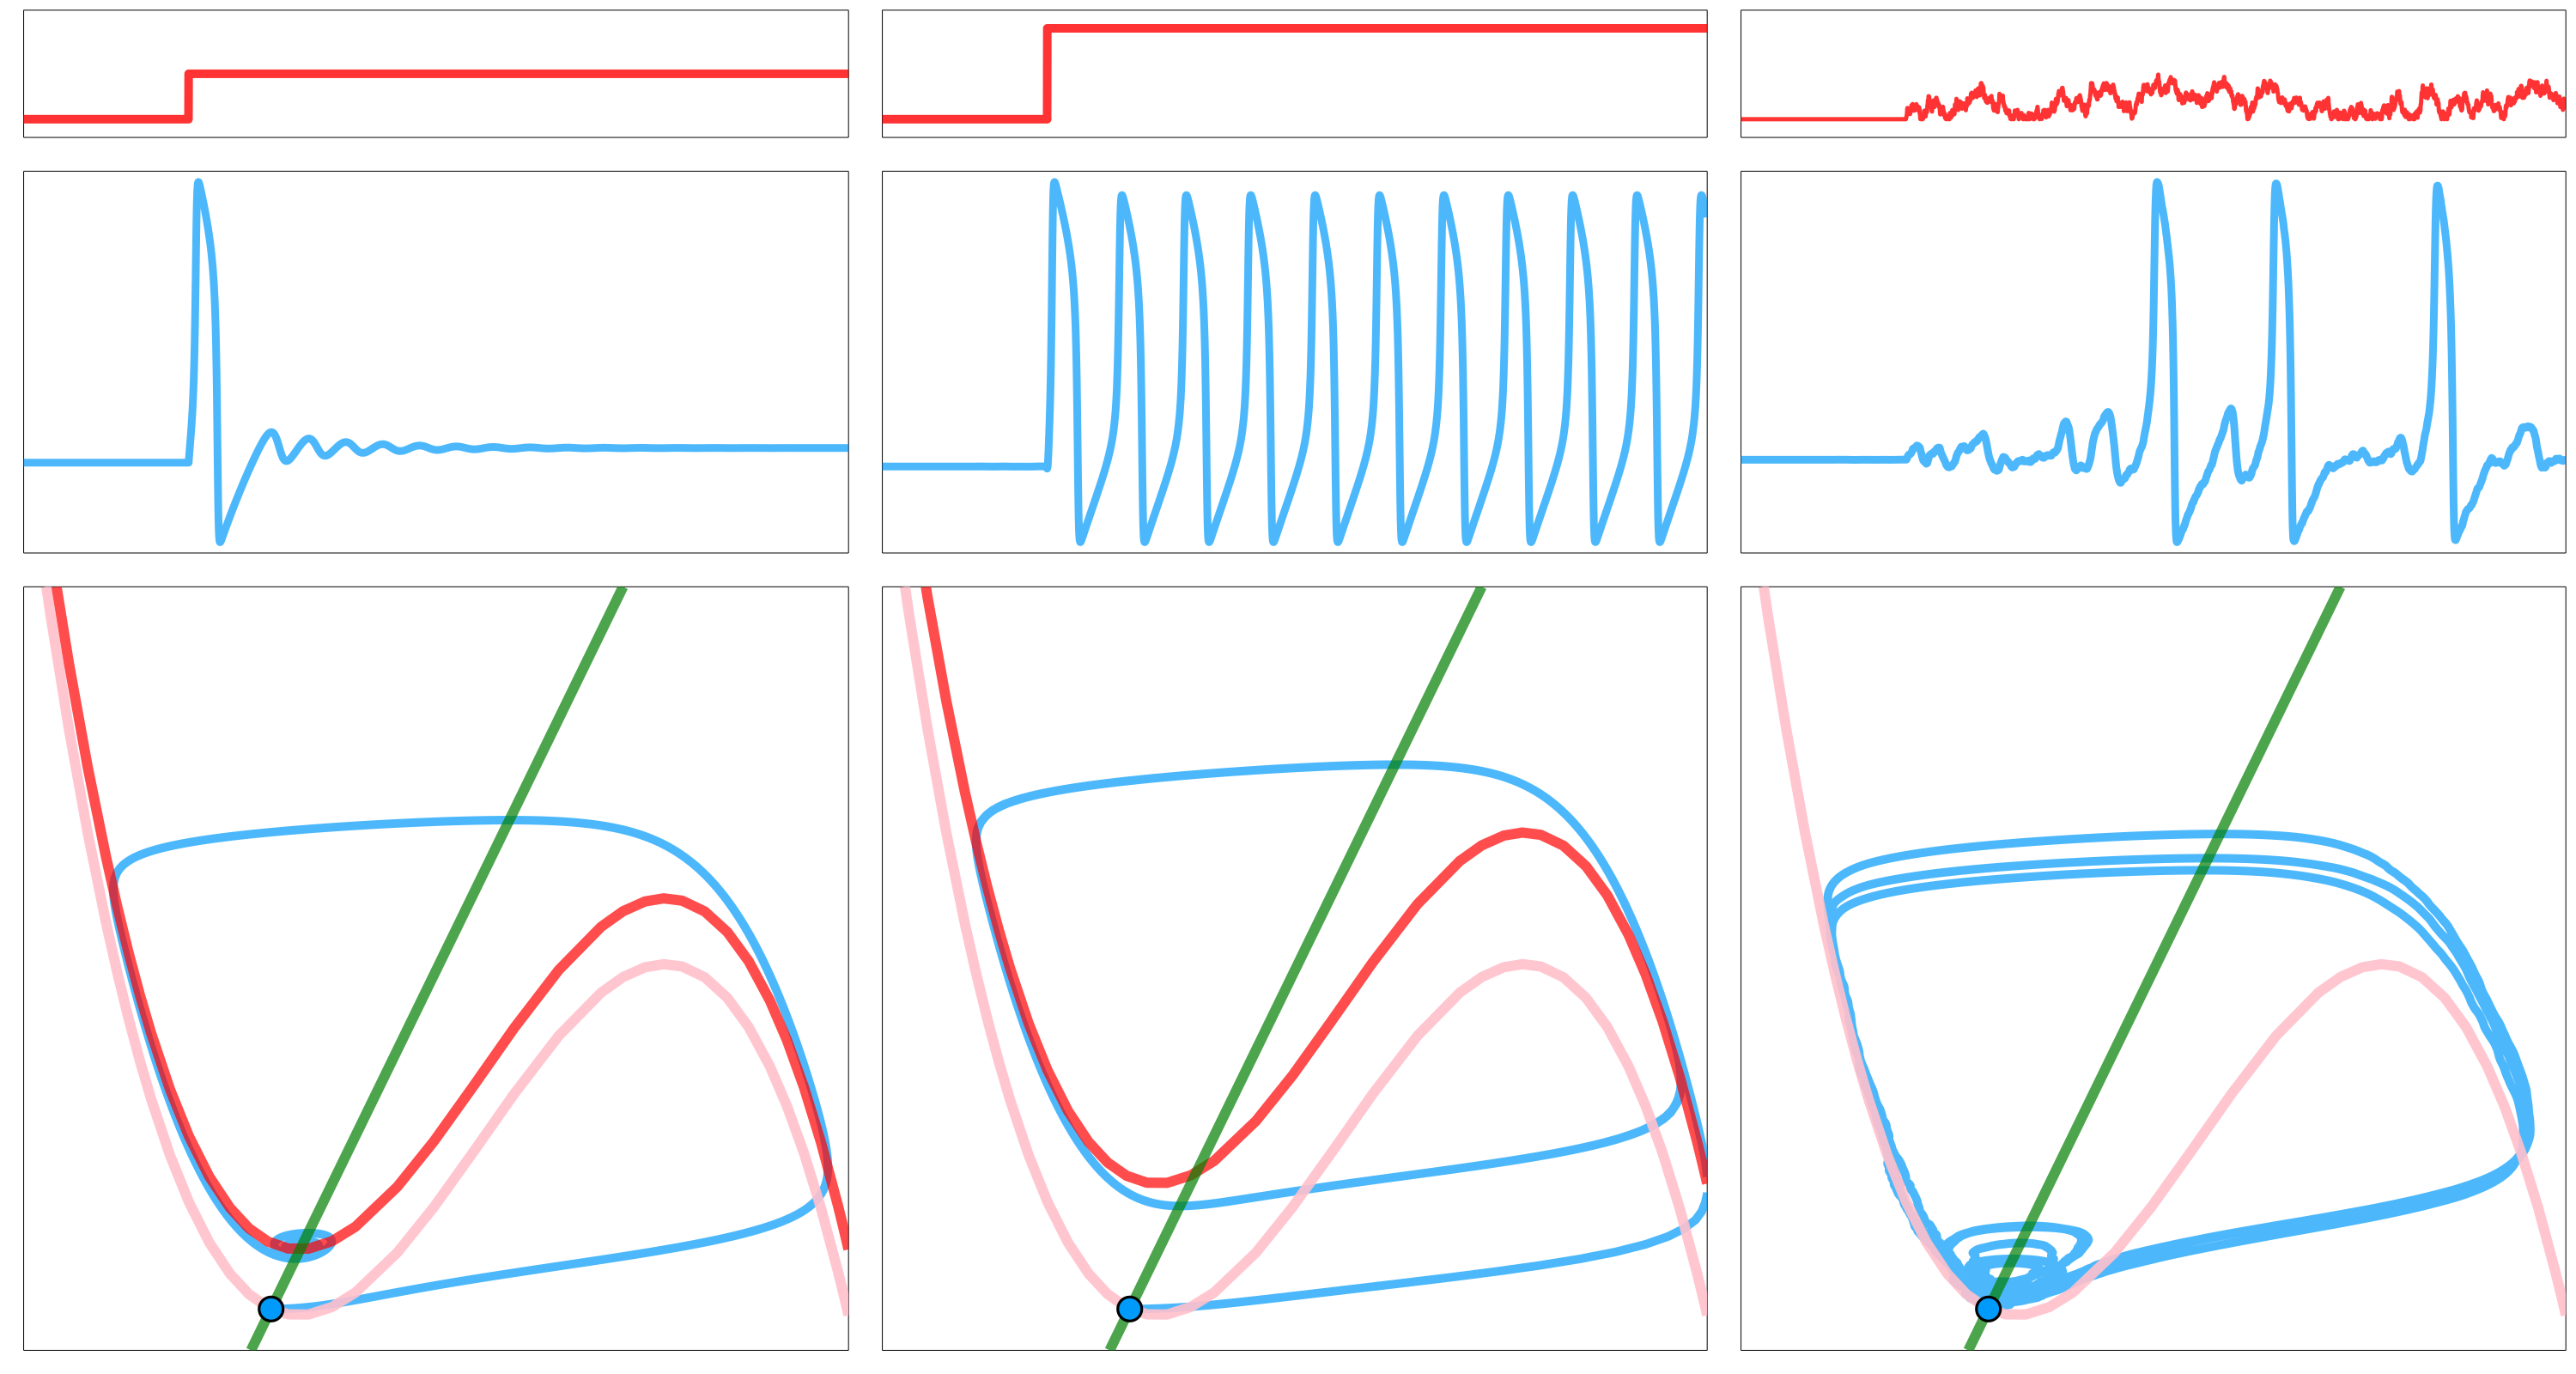

In [211]:
thesis_figure_17 = plot(excitable_sbp1,excitable_sbp2,excitable_sbp3,layout=(1,3),size=(3000,1600),left_margin=5mm,bottom_margin=5mm)

In [212]:
savefig(thesis_figure_17,"Figures/Figure17/generated_base.png")
savefig(thesis_figure_17,"Figures/Figure17/generated_base.svg")
savefig(plot!(excitable_sbp2,legend=:topright),"Figures/Figure17/legend_base.png")
savefig(plot!(excitable_sbp2,legend=:topright),"Figures/Figure17/legend_base.svg")

## Figure 18

In [4]:
#A callback for keeping a simulation within the positive domain.
function positive_domain()
    condition(u,t,integrator) = minimum(u) < 0
    affect!(integrator) = integrator.u .= integrator.uprev
    return DiscreteCallback(condition,affect!,save_positions = (false,false))
end;

#### Nonlinear

In [5]:
rn_nonlinear = @reaction_network begin
    p, 0 --> X
    b, 2X --> X2
    (d,d), (X,X2) --> 0
end p b d;

In [6]:
u0 = [0.7807764064044158, 0.6096116600663821]
tspan = (0., 10000.)
p = [0.05, 0.05, 0.025]

prob_nonlinear_det = ODEProblem(rn_nonlinear,u0,tspan,p)
sol_nonlinear_det = solve(prob_nonlinear_det,Rosenbrock23());

In [7]:
u0 = [0.7975939078232863, 0.8219645020503509]
prob_nonlinear_stoch = SDEProblem(rn_nonlinear,u0,tspan,[p...,1.0,0.0,1.0,0.0],noise_scaling=(@variables η1 η2 η3 η4))
@time sol_nonlinear_stoch = solve(prob_nonlinear_stoch,Rosenbrock23(),adaptive=false,dt=0.01,callback=positive_domain());

 50.057608 seconds (116.22 M allocations: 39.485 GiB, 12.01% gc time)


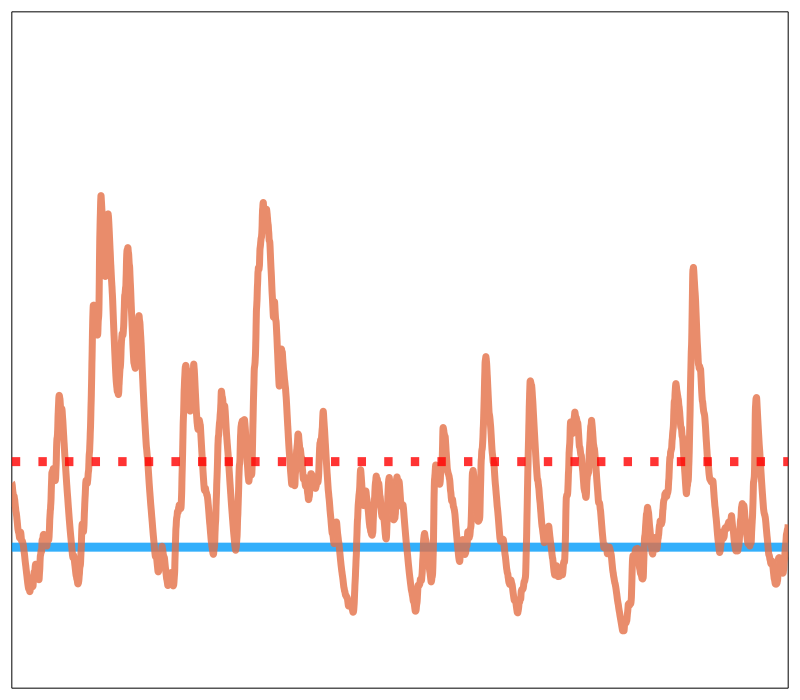

In [66]:
tend = 2000;
lw = 9; la = 0.8;
plot(sol_nonlinear_det,lw=lw,la=la,vars=[2],label="RRE interpretation")
plot!(sol_nonlinear_stoch,lw=7,la=la,vars=[2],label="CLE interpretation")
plot_nonlinear = plot!([0.,tend],[mean(last.(sol_nonlinear_stoch.u)),mean(last.(sol_nonlinear_stoch.u))],color=:red,linestyle=:dot,lw=lw,la=la,vars=[2],xlimit=(0.,tend),label="CLE, mean concentration",xticks=[],yticks=[],legend=:none,xguide="",yguide="",legendfontsize=9,size=(800,700))

#### Oscillation

In [9]:
rn_oscillation = @reaction_network begin
    (v0+hill(Z,v,K,-n),d), 0 <--> X
    (v0+hill(X,v,K,-n),d), 0 <--> Y
    (v0+hill(Y,v,K,-n),d), 0 <--> Z
end v0 v K n d;

In [38]:
u0_1 = [3.0875634913318875, 1.7271999702347234, 4.1867321616311255]
u0_2 = [3.6224484899068634, 3.622471232569596, 3.6224743082878677]
tspan = (0., 1000.)
p1 = [0.,1.0,2.0,3.,0.1,0.5]
p2 = [0.,1.0,3.0,3.,0.1,0.5]

prob1_oscillation_det = ODEProblem(rn_oscillation,u0_1,tspan,p1)
sol1_oscillation_det = solve(prob1_oscillation_det,Rosenbrock23())
plot1_oscillation_det = plot(sol1_oscillation_det,lw=3,la=0.9,vars=[1,2,3],ylimit=(0.,10.))

prob2_oscillation_det = ODEProblem(rn_oscillation,u0_2,tspan,p2)
sol2_oscillation_det = solve(prob2_oscillation_det,Rosenbrock23())
plot2_oscillation_det = plot(sol2_oscillation_det,lw=3,la=0.9,vars=[1,2,3],ylimit=(0.,10.))

plot(plot1_oscillation_det,plot2_oscillation_det,size=(900,300));

In [39]:
prob1_oscillation_stoch = SDEProblem(rn_oscillation,u0_1,tspan,p1,noise_scaling=(@variables η)[1])
sol1_oscillation_stoch = solve(prob1_oscillation_stoch,ImplicitEM(),adaptive=false,dt=0.01,callback=positive_domain())
plot1_oscillation_stoch = plot(sol1_oscillation_stoch,lw=3,la=0.9,vars=[1,2,3],ylimit=(0.,10.))

prob2_oscillation_stoch = SDEProblem(rn_oscillation,u0_2,tspan,p2,noise_scaling=(@variables η)[1])
sol2_oscillation_stoch = solve(prob2_oscillation_stoch,ImplicitEM(),adaptive=false,dt=0.01,callback=positive_domain())
plot2_oscillation_stoch = plot(sol2_oscillation_stoch,lw=3,la=0.9,vars=[1,2,3],ylimit=(0.,10.))

plot(plot1_oscillation_stoch,plot2_oscillation_stoch,size=(900,300));

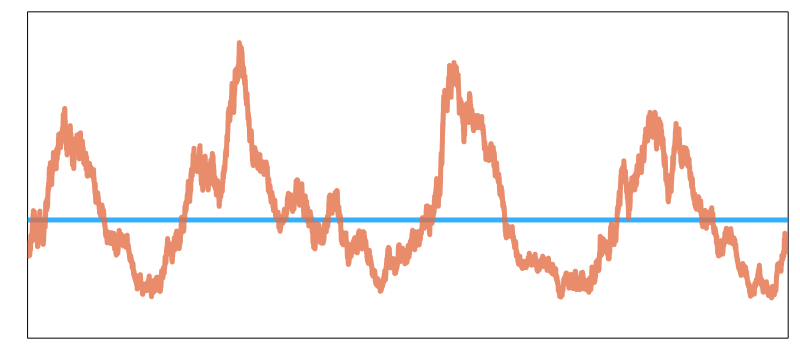

In [67]:
lw = 5; la = 0.8;
plot(sol2_oscillation_det,lw=lw,la=la,vars=[1],label="RRE interpretation, K=3")
plot!(sol2_oscillation_stoch,lw=lw,la=la,vars=[1],label="CLE interpretation, K=3")
plot_oscillation_CLE = plot!(ylimit=(0.,10.),xlimit=(500.,750.),xguide="",yguide="",legendfontsize=9,xticks=[],yticks=[],legend=:none,left_margin=5mm,size=(800,350))

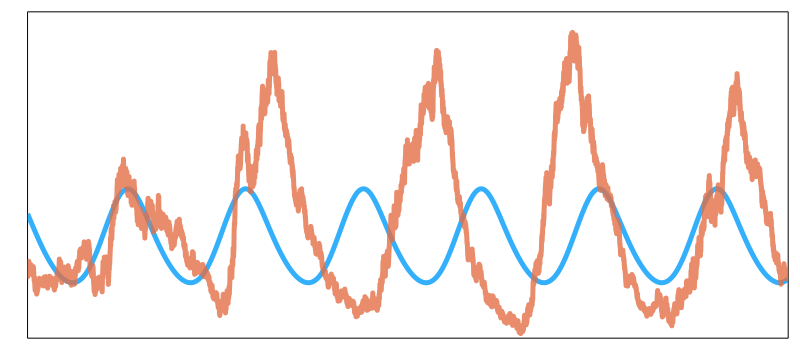

In [68]:
lw = 5; la = 0.8;
plot(sol1_oscillation_det,lw=lw,la=la,vars=[1],label="RRE interpretation, K=2")
plot!(sol1_oscillation_stoch,lw=lw,la=la,vars=[1],label="CLE interpretation, K=2")
plot_oscillation_RRE = plot!(ylimit=(0.,10.),xlimit=(500.,750.),xguide="",yguide="",legendfontsize=9,xticks=[],yticks=[],left_margin=5mm,size=(800,350),legend=:none)

#### Bistability

In [13]:
rn_bistability = @reaction_network begin
    (v0+hill(X,v,K,n),d), 0 <--> X
end v0 v K n d;

In [52]:
tspan = (0., 25000.)
p = [0.1,1,30.7,2,0.02,1.];

In [53]:
u0s = 2.5:2.5:30.
probs_bistability = map(u0 -> ODEProblem(rn_bistability,[u0],tspan,p), u0s)
sols_bistability = map(prob -> solve(prob,Rosenbrock23()), probs_bistability);

In [56]:
u0 = [30.]
prob_bistability = SDEProblem(rn_bistability,u0,tspan,p,noise_scaling=(@variables η)[1])
sol_bistability = solve(prob_bistability,ImplicitEM());

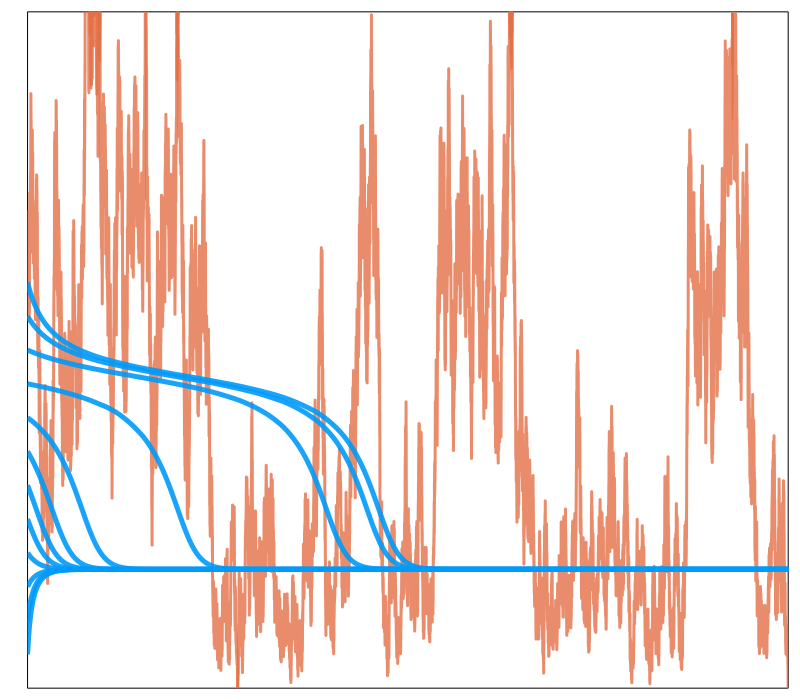

In [62]:
plot(sol_bistability,lw=3,la=0.8,color=2,label="CLE Interpretation")
foreach(sol->plot!(sol,lw=5,la=0.9,color=1,label=""), sols_bistability)
plot_bistability = plot!([],[],lw=3,la=0.9,color=1,label="RRE Interpretation",xguide="",yguide="",legend=:none,legendfontsize=9,xticks=[],yticks=[],xlimit=(0.,20000.),ylimit=(0.,50.),left_margin=5mm,size=(800,700))

In [69]:
savefig(plot_nonlinear,"Figures/Figure18/nonlinear.png")
savefig(plot_nonlinear,"Figures/Figure18/nonlinear.svg")
savefig(plot_oscillation_CLE,"Figures/Figure18/oscillation_stoch.png")
savefig(plot_oscillation_CLE,"Figures/Figure18/oscillation_stoch.svg")
savefig(plot_oscillation_RRE,"Figures/Figure18/oscillation_det.png")
savefig(plot_oscillation_RRE,"Figures/Figure18/oscillation_det.svg")
savefig(plot_bistability,"Figures/Figure18/bistability.png")
savefig(plot_bistability,"Figures/Figure18/bistability.svg")

#### Excitable

### Thesis Figure Plot

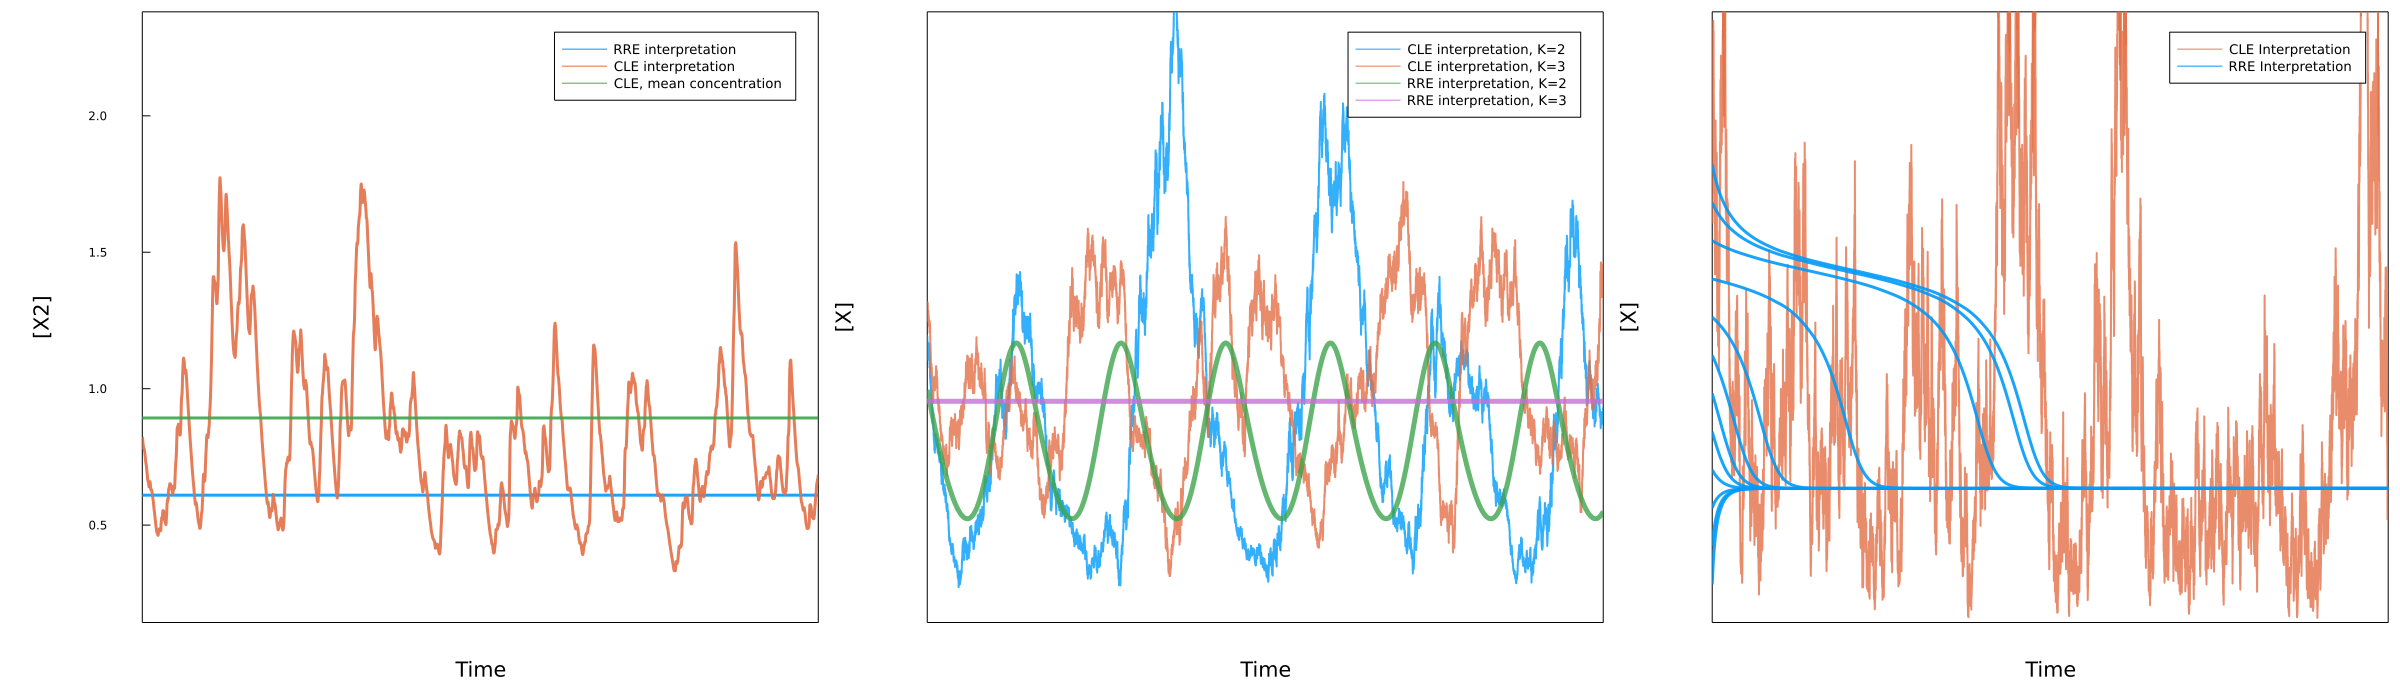

In [23]:
thesis_figure_18 = plot(plot_nonlinear,plot_oscillation,plot_bistability,layout=(1,3),size=(2400,700),left_margin=20mm,bottom_margin=15mm)

In [241]:
savefig(thesis_figure_18,"Figures - Thesis/effect_of_noise.png")

## Other

In [175]:
rn = @reaction_network begin
    (p,d), 0 <--> X
end p d;
parameters = [.5,0.05]
u0 = [1.]
tend = 100.;

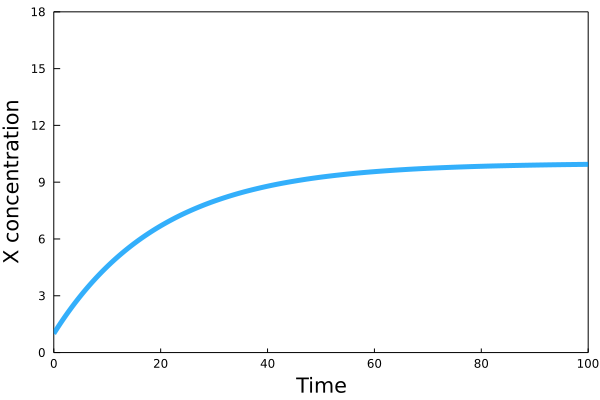

In [177]:
prob_RRE = ODEProblem(rn,u0,(0.,tend),parameters)
sol_RRE = solve(prob_RRE,Rosenbrock23()); plot(sol_RRE,lw=5,la=0.8,label="");
RRE_interpretation_plot = plot!(xguide="Time",yguide="X concentration",ylimit=(0.,18.))

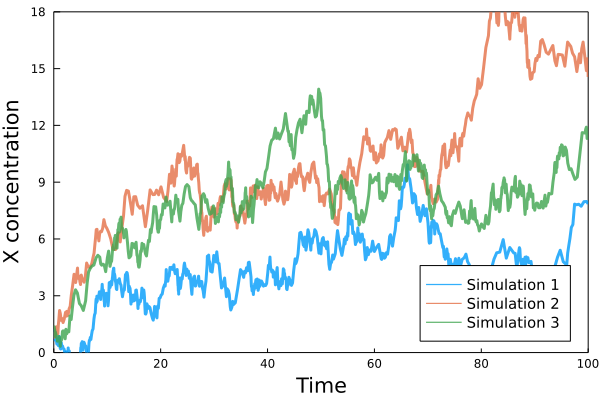

In [181]:
prob_CLE = SDEProblem(rn,u0,(0.,tend),parameters)
sol_CLE1 = solve(prob_CLE,ImplicitEM()); plot(sol_CLE1,lw=3,la=0.8,label="Simulation 1");
sol_CLE2 = solve(prob_CLE,ImplicitEM()); plot!(sol_CLE2,lw=3,la=0.8,label="Simulation 2");
sol_CLE3 = solve(prob_CLE,ImplicitEM()); plot!(sol_CLE3,lw=3,la=0.8,label="Simulation 3");
CLE_interpretation_plot = plot!(xguide="Time",yguide="X concentration",legend=:bottomright,legendfontsize=10,ylimit=(0.,18.))

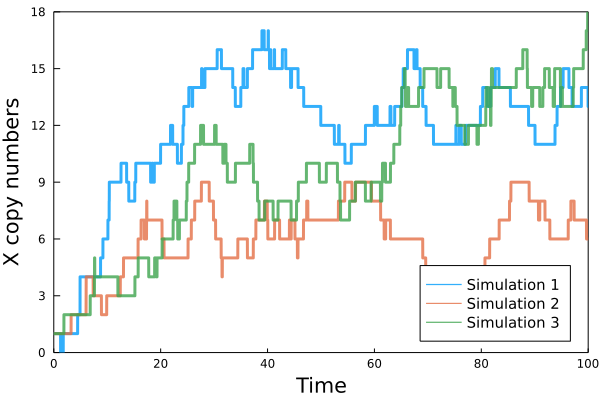

In [182]:
prob_Gillespie = DiscreteProblem(rn,Int64.(u0),(0.,tend),parameters)
prob_Gillespie = JumpProblem(rn,prob_Gillespie,Direct())
sol_Gillespie1 = solve(prob_Gillespie,SSAStepper()); plot(sol_Gillespie1,lw=3,la=0.8,label="Simulation 1");
sol_Gillespie2 = solve(prob_Gillespie,SSAStepper()); plot!(sol_Gillespie2,lw=3,la=0.8,label="Simulation 2");
sol_Gillespie3 = solve(prob_Gillespie,SSAStepper()); plot!(sol_Gillespie3,lw=3,la=0.8,label="Simulation 3");
Gillespie_interpretation_plot = plot!(xguide="Time",yguide="X copy numbers",legend=:bottomright,legendfontsize=10,ylimit=(0.,18.))

In [192]:
function cme(du,u,p,t)
    λ,β = p
    du[1] = β*u[2] - λ*u[1]; 
    du[n] = λ*u[n-1] - β*(n-1)*u[n]; 
    for i = 2:(n-1)
        du[i] = λ*u[i-1] - (λ+β*(i-1))*u[i] + β*i*u[i+1]; 
    end
end
function my_bar_plot!(data;lw=3,la=0.8,color=:blue,label="")
    plot!([-0.5,-0.5],[0.,data[1]],lw=lw;la=la,color=color,label=label); plot!([0.5,0.5],[data[1],data[1]],lw=lw;la=la,color=color,label="");
    for i = 2:(length(data)-1)
        plot!([i-1.5,i-1.5],[data[i-1],data[i]],lw=lw;la=la,color=color,label=""); plot!([i-1.5,i-0.5],[data[i],data[i]],lw=lw;la=la,color=color,label="");
    end
    return plot!()
end;

In [193]:
n = 200;
u0_CME = zeros(n); u0_CME[Int64(u0[1])+1] = 1;
prob_CME = ODEProblem(cme,u0_CME,(0.,tend),parameters);
sol_CME = solve(prob_CME,tstops=0:0.1:tend);

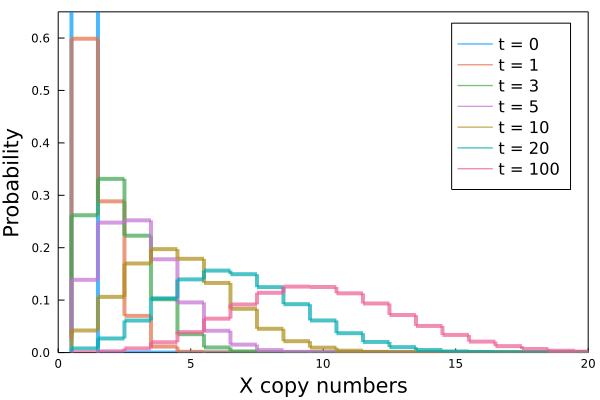

In [201]:
plot();
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==0.0)][1:end],lw=4,la=0.7,color=1,label="t = 0"); 
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==1.0)][1:end],lw=4,la=0.7,color=2,label="t = 1"); 
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==3.0)][1:end],lw=4,la=0.7,color=3,label="t = 3");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==5.0)][1:end],lw=4,la=0.7,color=4,label="t = 5");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==10.0)][1:end],lw=4,la=0.7,color=5,label="t = 10");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==20.0)][1:end],lw=4,la=0.7,color=6,label="t = 20");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==100.0)][1:end],lw=4,la=0.7,color=7,label="t = 100");
CME_interpretation_plot = plot!(xguide="X copy numbers",yguide="Probability",xlimit=(0.,20.),ylimit=(0.,.65),legendfontsize=11)

In [195]:
A(i,u,λ,β,grid) = (0 < i <= length(grid)) ? u[i]*(λ-β*grid[i]) : 0.0
B(i,u,λ,β,grid) = (0 < i <= length(grid)) ? u[i]*(λ+β*grid[i]) : 0.0
function cfpe(du,u,p,t)
    λ,β = p
    for i = 1:length(grid)
        du[i] = - (1/Δx) * (A(i,u,λ,β,grid) - A(i-1,u,λ,β,grid)) + (0.5/Δx^2) * (B(i+1,u,λ,β,grid) -2*B(i,u,λ,β,grid) + B(i-1,u,λ,β,grid))
    end
end;

In [191]:
grid = 0:0.05:200.0; Δx = grid[2]
u0_CFPE = zeros(length(grid)); u0_CFPE[findfirst(grid.>=1.0)] = 1;
prob_CFPE = ODEProblem(cfpe,u0_CFPE,(0.,tend),parameters);
@time sol_CFPE = solve(prob_CFPE,tstops=0:0.1:tend);

 72.138580 seconds (946.49 M allocations: 14.966 GiB, 3.79% gc time, 3.20% compilation time)


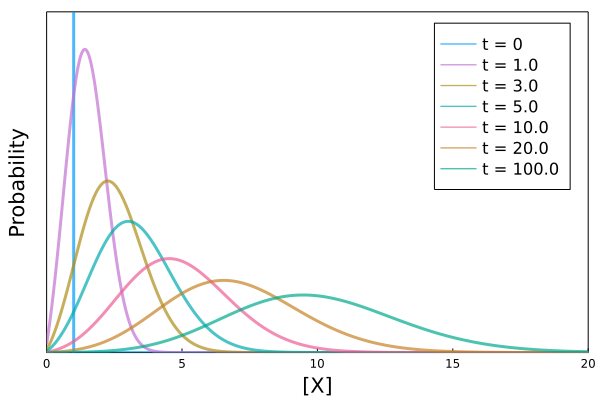

In [204]:
#plot(sol[findfirst(sol.t.==0.5)])
h = 1.0;
scatter((u0[1],h),markershape=:circle,color=1,label="")
plot!([u0[1],u0[1]],[0,h],color=1,label="t = 0",lw=3,la=0.7)
plot!([0,tend],[0,0],color=1,label="",lw=3,la=0.7)
plot!(grid,sol_CFPE[findfirst(sol_CFPE.t.==1.0)],lw=3,la=0.7,label="t = 1.0")
plot!(grid,sol_CFPE[findfirst(sol_CFPE.t.==3.0)],lw=3,la=0.7,label="t = 3.0")
plot!(grid,sol_CFPE[findfirst(sol_CFPE.t.==5.0)],lw=3,la=0.7,label="t = 5.0")
plot!(grid,sol_CFPE[findfirst(sol_CFPE.t.==10.0)],lw=3,la=0.7,label="t = 10.0")
plot!(grid,sol_CFPE[findfirst(sol_CFPE.t.==20.0)],lw=3,la=0.7,label="t = 20.0")
plot!(grid,sol_CFPE[findfirst(sol_CFPE.t.==100.0)],lw=3,la=0.7,label="t = 100.0")
CFPE_interpretation_plot = plot!(xguide="[X]",yguide="Probability",xlimit=(0.,20.),ylimit=(0.,0.03),legendfontsize=11,yticks=[],left_margin=5mm)

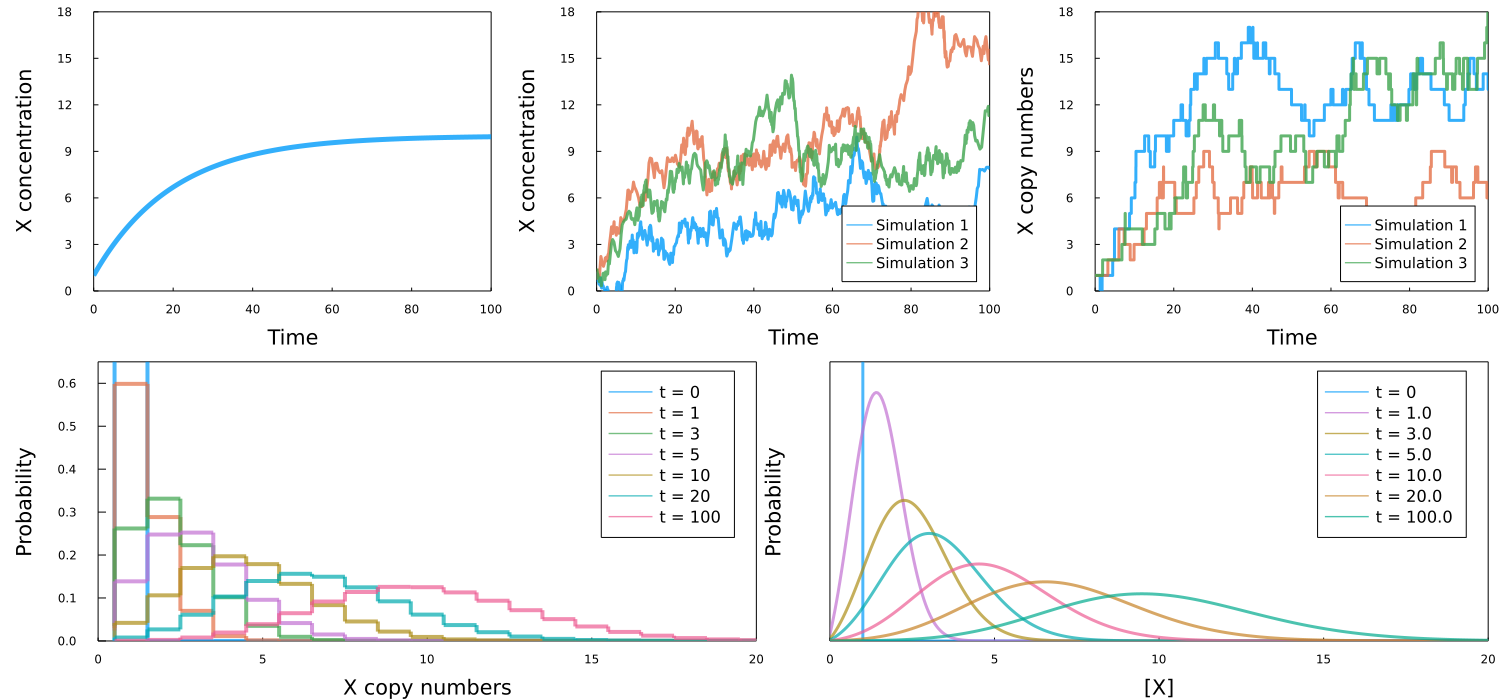

In [209]:
plot(RRE_interpretation_plot,CLE_interpretation_plot,Gillespie_interpretation_plot,CME_interpretation_plot,CFPE_interpretation_plot,size=(1500,700),bottom_margin=5mm,left_margin=10mm,layout=@layout[a b c; d e])

In [5]:
rn = @reaction_network begin
    (p,d), 0 <--> X
    (0.0000002*X^3,0.001*d), 0 <--> Y
end p d
rm = Model(rn,[100.,1.]);

In [6]:
rn = @reaction_network begin
    (b,d), 2X <--> X2
end b d
rm = Model(rn,[1.,1.]);

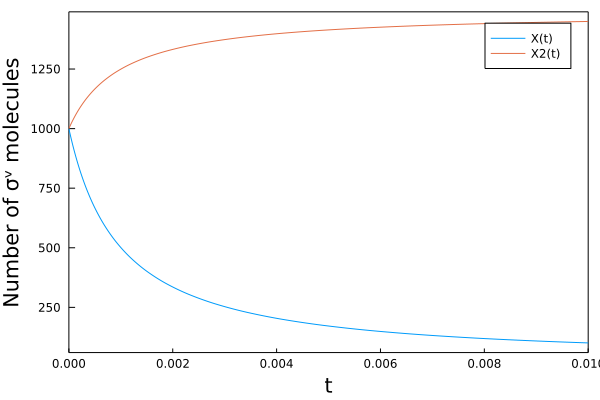

In [21]:
sol_det = detsim(rm,(0.,1000),u0=[1000,1000])
plot(sol_det)

In [ ]:
plot(sol_det,vars=[2])

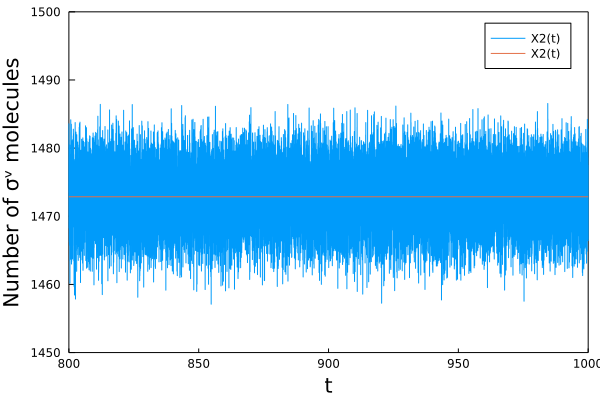

In [19]:
plot(sol,vars=[2])
plot!(sol_det,vars=[2],xlimit=(800,1000),ylimit=(1450,1500))

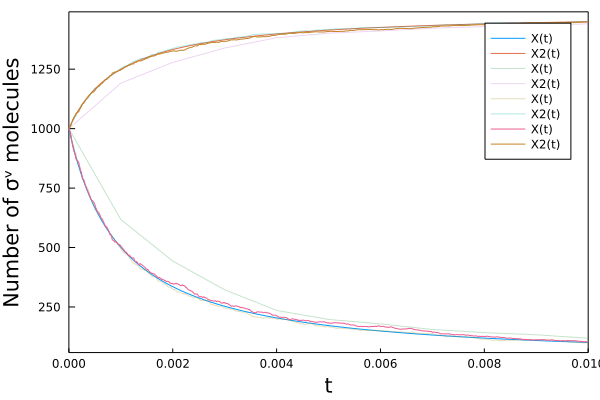

In [24]:
sol_stoch = stochsim(rm,(0.,1000),u0=[1000,1000],adaptive=false,dt=0.00001)
plot!(sol_stoch)

In [13]:
sol.u[end]

2-element Vector{Float64}:
   62.301386383158324
 1468.84930680852

In [14]:
mean(last.(sol.u)[1000:end])

1473.0768348996387

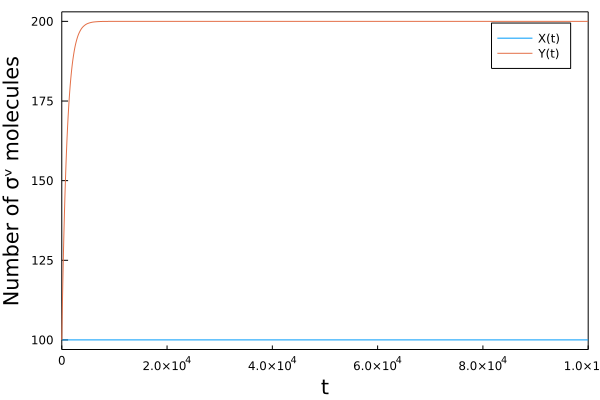

In [91]:
sol = detsim(rm,(0.,100000),u0=[100,100])
plot(sol)

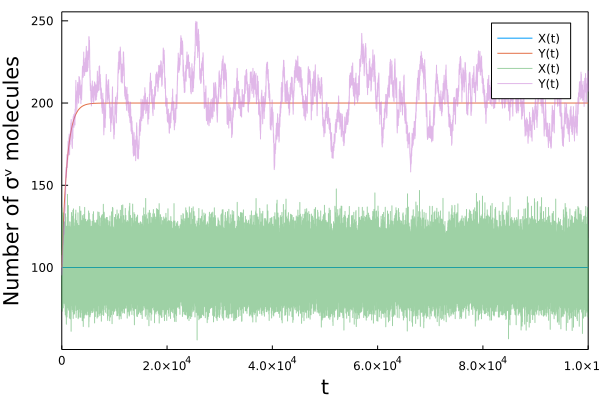

In [89]:
sol = stochsim(rm,(0.,100000),u0=[100,100])
plot!(sol,la=0.5)

In [90]:
mean(last.(sol.u)[1000:end])

202.3472567309058

In [92]:
mean(last.(sol.u)[1000:end])

NaN